https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Importing Dependencies 

In [1]:
!pip install --upgrade nbformat
!pip install --upgrade nbconvert


In [2]:
#pip install seaborn

In [3]:
#pip install scikit-learn

In [4]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd   #for handling dataset
import  numpy as np # for numerical calculation
import matplotlib.pyplot as plt # for plotting data 
import seaborn as sns # for plotting library
from sklearn.model_selection import StratifiedShuffleSplit # for stratified splitting
from imblearn.over_sampling import SMOTE # for performing SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve


In [6]:
pd.set_option('display.max_columns', None)


# functions

In [7]:
def find_duplicate_columns(df):
    duplicate_columns = []
    for x in range(df.shape[1]):
        col = df.iloc[:, x]
        for y in range(x + 1, df.shape[1]):
            other_col = df.iloc[:, y]
            if col.equals(other_col):
                duplicate_columns.append(df.columns.values[y])
    return duplicate_columns

In [8]:
def categorize_amount(amount):
    if amount <= 2500:
        return '0-2500'
    else:
        return '2500-above'

# loading the main data file

In [9]:
creditcard_df = pd.read_csv('creditcard.csv')

# EDA

In [10]:
creditcard_df.head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [11]:
creditcard_df.shape

(284807, 31)

In [12]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
129047   78933.0  1.215327  0.352891  0.291521  0.636956 -0.129823 -0.588850   
210612  138057.0  1.775467 -2.363142 -0.985711 -1.428335 -1.743297 -0.274068   
145628   87101.0  2.144402 -0.729518 -1.585760 -0.989597 -0.192415 -0.221739   
176561  122820.0 -0.229587  1.123001 -0.579939 -0.243008  2.153885 -0.194189   
129454   79091.0 -0.938796  1.253473  0.215817 -0.073340 -0.382875  0.153976   

              V7        V8        V9       V10       V11       V12       V13  \
129047  0.048950 -0.099466 -0.063016 -0.344200  0.258510  0.642892  0.812940   
210612 -1.146896 -0.002308 -1.060936  1.648370  0.167629 -0.991280 -1.107478   
145628 -0.760384  0.088557 -0.295378  0.408259  0.652861 -0.716453 -0.968620   
176561  1.533904 -0.169186 -1.268453 -0.252709 -0.046318  0.344898  0.236552   
129454 -0.037612  1.089789 -0.917365 -0.649718  1.333720  0.662267 -1.046363   

             V14       V15       V16       V17       V18       V19       V20  \
129047 -0.380176  1.279176  0.157520  0.238343 -0.822729 -0.560550 -0.075444   
210612  0.006912 -0.498368 -0.103321  0.227706  0.763465  0.053253 -0.026552   
145628 -1.111197 -0.358679  1.913747  0.744681 -0.510933  1.196277  0.021531   
176561  0.789191 -0.932782  0.023342 -1.161362  0.514162  0.094472 -0.093744   
129454  1.359723  0.505389  0.041291  0.332056 -0.919716 -0.297197 -0.440789   

             V21       V22       V23       V24       V25       V26       V27  \
129047 -0.253552 -0.665366  0.152361  0.050493  0.164150  0.122181 -0.002453   
210612  0.022236 -0.059777  0.017336 -0.445969 -0.428146 -0.190977 -0.030838   
145628 -0.336962 -1.151023  0.401714 -0.102266 -0.505508 -0.687561 -0.013732   
176561  0.229065  0.609412 -0.421501 -0.139023  0.264082 -0.569156  0.131332   
129454 -0.203086 -0.994452  0.432662 -0.373760 -0.876611 -0.199524 -0.337500   

             V28  Amount  Class  
129047  0.028558    0.89      0  
210612 -0.019265  260.00      0  
145628 -0.025840   29.99      0  
176561  0.159455    2.97      0  
129454 -0.115649   43.99      0

In [13]:
find_duplicate_columns(creditcard_df)

[]

There is no duplicate columns

In [14]:
sset = ['Amount', 'Class']

In [15]:
creditcard_df[sset].describe()

Amount          Class
count  284807.000000  284807.000000
mean       88.349619       0.001727
std       250.120109       0.041527
min         0.000000       0.000000
25%         5.600000       0.000000
50%        22.000000       0.000000
75%        77.165000       0.000000
max     25691.160000       1.000000

plotting 

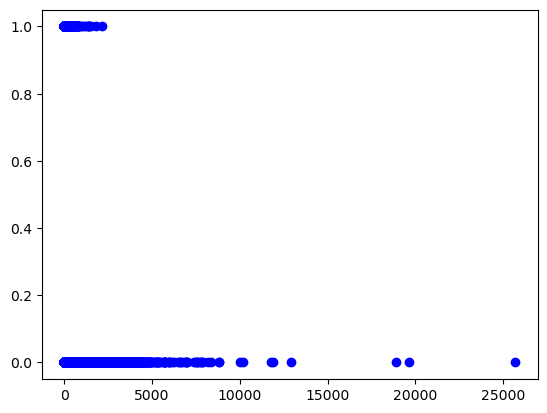

In [16]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

# Show the plot
plt.show()

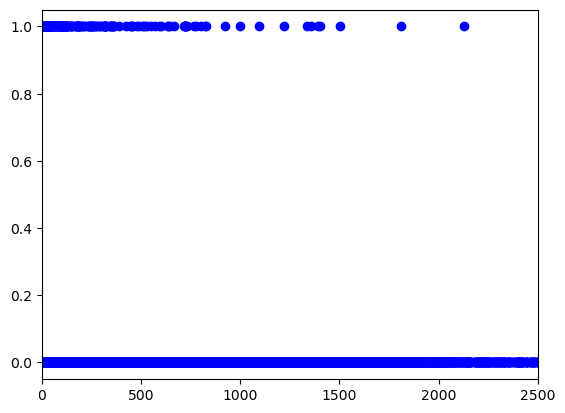

In [17]:
# Create scatter plot
plt.scatter(creditcard_df['Amount'], creditcard_df['Class'], c="blue")

plt.xlim(0,2500)

# Show the plot
plt.show()

Fruad transanction is below the amount of 2500

<Axes: >

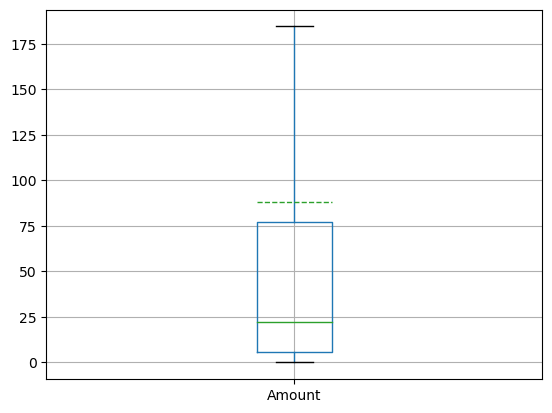

In [18]:
creditcard_df[['Amount']].boxplot(showfliers=False, meanline=True, showmeans=True)


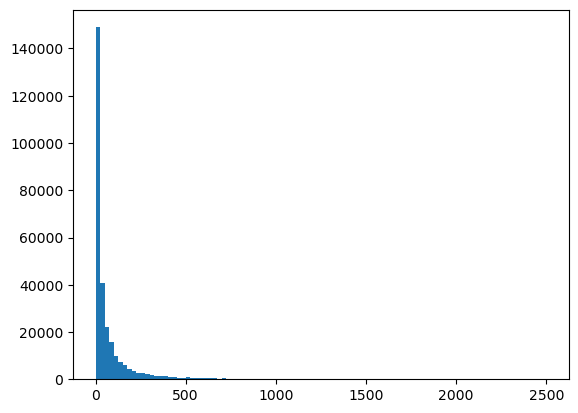

In [19]:
plt.hist(creditcard_df['Amount'], bins= 100, range = (0, 2500))
plt.show()

<Axes: >

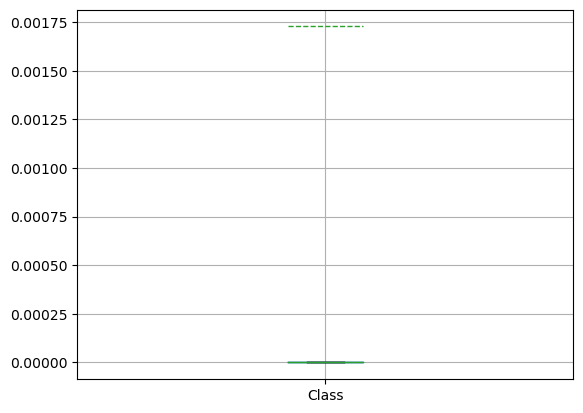

In [20]:
creditcard_df[['Class']].boxplot(showfliers=False, meanline=True, showmeans=True)

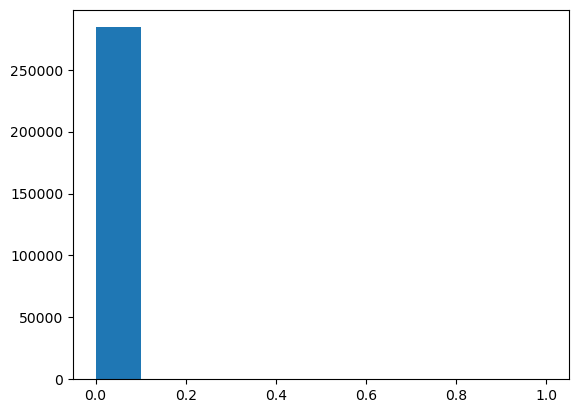

In [21]:
plt.hist(creditcard_df['Class'])
plt.show()

In [22]:
creditcard_df['Class'].sum(axis =0)

492

Hihgly imbalanced data 

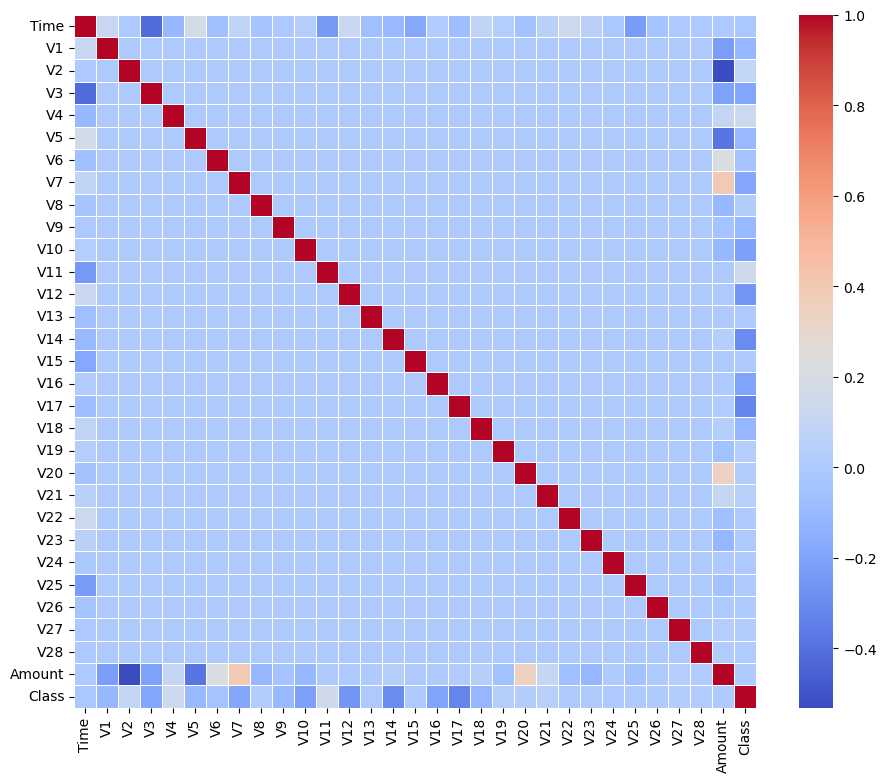

In [23]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr = creditcard_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

most of the columns are uncorrelated so we will use all of them for Supervised Machine Learning and for the purpose of feature Selection we are not merging the same columns

***Group by anaylsis***

*class*

In [24]:
grouped_class_df = creditcard_df.groupby('Class')

In [25]:
grouped_class_df.describe()

Time                                                       \
          count          mean           std    min      25%      50%   
Class                                                                  
0      284315.0  94838.202258  47484.015786    0.0  54230.0  84711.0   
1         492.0  80746.806911  47835.365138  406.0  41241.5  75568.5   

                                 V1                                          \
            75%       max     count      mean       std       min       25%   
Class                                                                         
0      139333.0  172792.0  284315.0  0.008258  1.929814 -56.40751 -0.917544   
1      128483.0  170348.0     492.0 -4.771948  6.783687 -30.55238 -6.036063   

                                           V2                                 \
            50%       75%       max     count      mean       std        min   
Class                                                                          
0      0.020023  1.316218  2.454930  284315.0 -0.006271  1.636146 -72.715728   
1     -2.342497 -0.419200  2.132386     492.0  3.623778  4.291216  -8.402154   

                                                      V3                      \
            25%       50%       75%        max     count      mean       std   
Class                                                                          
0     -0.599473  0.064070  0.800446  18.902453  284315.0  0.012171  1.459429   
1      1.188226  2.717869  4.971257  22.057729     492.0 -7.033281  7.110937   

                                                                V4            \
             min       25%       50%       75%       max     count      mean   
Class                                                                          
0     -48.325589 -0.884541  0.182158  1.028372  9.382558  284315.0 -0.007860   
1     -31.103685 -8.643489 -5.075257 -2.276185  2.250210     492.0  4.542029   

                                                                          V5  \
            std       min       25%       50%       75%        max     count   
Class                                                                          
0      1.399333 -5.683171 -0.850077 -0.022405  0.737624  16.875344  284315.0   
1      2.873318 -1.313275  2.373050  4.177147  6.348729  12.114672     492.0   

                                                                     \
           mean       std         min       25%       50%       75%   
Class                                                                 
0      0.005453  1.356952 -113.743307 -0.689398 -0.053457  0.612181   
1     -3.151225  5.372468  -22.105532 -4.792835 -1.522962  0.214562   

                        V6                                                     \
             max     count      mean       std        min       25%       50%   
Class                                                                           
0      34.801666  284315.0  0.002419  1.329913 -26.160506 -0.766847 -0.273123   
1      11.095089     492.0 -1.397737  1.858124  -6.406267 -2.501511 -1.424616   

                                  V7                                           \
            75%        max     count      mean       std        min       25%   
Class                                                                           
0      0.399619  73.301626  284315.0  0.009637  1.178812 -31.764946 -0.551442   
1     -0.413216   6.474115     492.0 -5.568731  7.206773 -43.557242 -7.965295   

                                             V8                      \
            50%       75%         max     count      mean       std   
Class                                                                 
0      0.041138  0.571019  120.589494  284315.0 -0.000987  1.161283   
1     -3.034402 -0.945954    5.802537     492.0  0.570636  6.797831   

                                                                 V9            \
             min       25%       50%       75

In [26]:
grouped_class_df.size()

Class
0    284315
1       492
dtype: int64

In [27]:
grouped_class1_df = grouped_class_df.get_group(1)

In [28]:
grouped_class1_df.sample(3)

Time         V1        V2         V3        V4         V5  \
105178  69394.0   1.140431  1.134243  -1.429455  2.012226   0.622800   
79536   58067.0  -0.264869  3.386140  -3.454997  4.367629   3.336060   
150667  93860.0 -10.850282  6.727466 -16.760583  8.425832 -10.252697   

              V6         V7        V8        V9        V10       V11  \
105178 -1.152923   0.221159  0.037372  0.034486  -1.879644  2.191665   
79536  -2.053918   0.256890 -2.957235 -2.855797  -2.808456  1.847504   
150667 -4.192171 -14.077086  7.168288 -3.683242 -15.239962  8.030708   

              V12       V13        V14       V15        V16        V17  \
105178  -0.487850 -1.757137  -4.461051 -0.402884   1.410917   3.619251   
79536   -2.414822 -2.573225  -6.599126  0.123470   2.572372   6.609366   
150667 -16.060306  0.270530 -14.952981 -0.241095 -11.866731 -15.486990   

             V18       V19       V20       V21       V22       V23       V24  \
105178  2.284927 -0.443999 -0.099712 -0.367136 -0.891627 -0.160578 -0.108326   
79536   2.530670 -3.602657  0.482513 -1.394504 -0.166029 -1.452081 -0.251815   
150667 -5.748652  4.130031 -0.646818  2.541637  0.135535 -1.023967  0.406265   

             V25       V26       V27       V28  Amount  Class  
105178  0.668374 -0.352393  0.071993  0.113684     1.0      1  
79536   1.243461  0.452787  0.132218  0.424599     1.0      1  
150667  0.106593 -0.026232 -1.464630 -0.411682    78.0      1

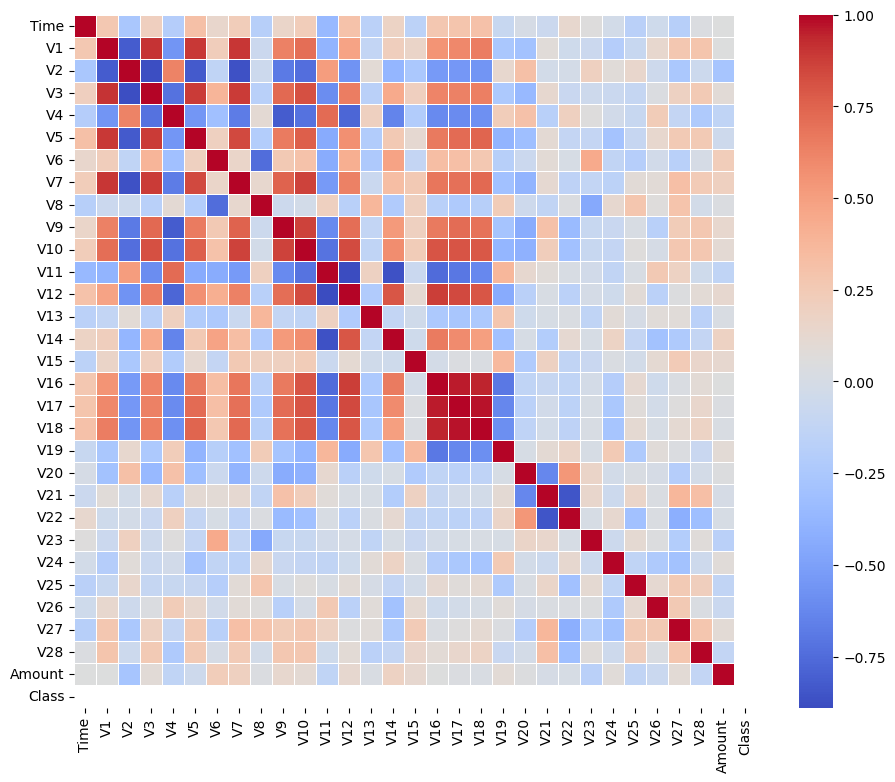

In [29]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class1_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

There are certain varibles for eg. V1 and V3 are highly correlated for fraudulent transaction

In [30]:
grouped_class0_df = grouped_class_df.get_group(0)

In [31]:
grouped_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
20488    31075.0 -1.334854  1.185871 -0.736948 -1.413435 -1.373504 -1.872606   
142116   84582.0  0.536765 -2.704029 -0.648463 -0.843504 -1.779050 -0.676576   
92761    64084.0 -6.458517  5.253677 -2.720343 -1.794557 -3.418742 -1.424571   
271257  164489.0  0.039062  0.889239  0.302199 -0.585161  0.431838 -1.116524   
261200  159912.0 -1.615717  1.585027 -0.072572 -0.297468 -1.783769  2.087499   

              V7        V8        V9       V10       V11       V12       V13  \
20488  -0.406977  0.924330 -1.587434  0.042525 -1.139129 -0.421500 -0.927782   
142116 -0.063248 -0.364845 -1.686428  1.175986 -1.217304 -1.451283 -0.613115   
92761  -2.655543  3.876718  0.828885  1.644176  0.261609  2.113606  0.421379   
271257  1.050711 -0.232965 -0.109813 -0.425771 -0.846933  0.363781  0.430186   
261200 -1.507961 -6.383632  0.980468 -0.067775  0.478014  0.790674 -0.825660   

             V14       V15       V16       V17       V18       V19       V20  \
20488   1.330331 -0.174471 -1.156074  0.460569  0.900809 -1.399842 -0.888010   
142116 -0.042192 -0.174409 -0.755601  0.823865  0.036550  0.026709  0.662668   
92761   1.871167 -0.328055  1.529433  0.376011  0.256756 -0.832347  0.822323   
271257  0.029346 -0.449952 -0.115014 -0.429630 -0.801883 -0.090812 -0.005785   
261200  0.634038  0.765334  0.394615 -0.253783  1.139063  0.458136 -1.824692   

             V21       V22       V23       V24       V25       V26       V27  \
20488  -0.104127 -0.268579  0.309765  0.709904 -1.046564  0.707069 -0.275284   
142116  0.073574 -0.517415 -0.580768  0.044279  0.495709 -0.094519 -0.090945   
92761  -0.079843 -0.434220  0.518095  0.300875  0.483979  0.753233  0.321825   
271257 -0.253421 -0.535450  0.072419  0.050588 -0.475029  0.136236  0.248946   
261200  6.152188 -1.528202 -0.808009 -0.475774  0.887927 -0.244281  0.825510   

             V28  Amount  Class  
20488   0.067097    9.00      0  
142116  0.095125  541.10      0  
92761   0.163674    2.92      0  
271257  0.098623    5.99      0  
261200  0.140807  344.00      0

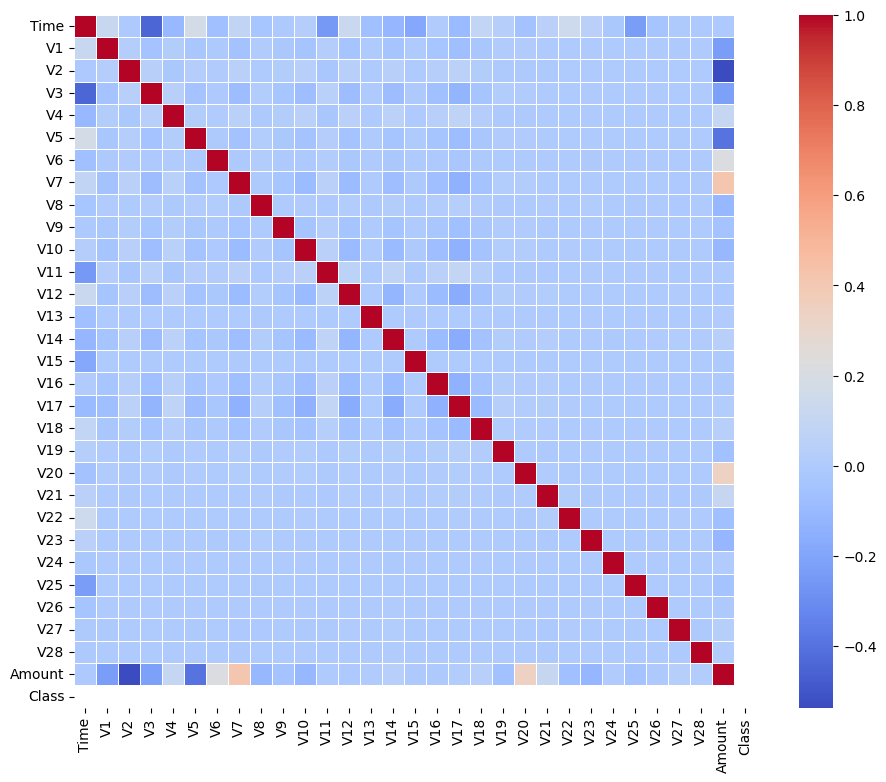

In [32]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_class0_df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

For the observation purpose we can observe that in case of both fraudulent and non fraudulent transactions the variables from V1 to V17 are correlated 

*Amount*

In [33]:
creditcard_df['Amount_Group'] = creditcard_df['Amount'].apply(categorize_amount)

In [34]:
creditcard_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
23534    32805.0  0.899869 -0.394860  1.202739  1.230660 -1.028713  0.247303   
22293    32154.0 -1.060785 -0.026794  0.902706 -1.579010  0.273654 -0.848267   
158235  111100.0  2.103279 -0.009427 -1.450142  0.333582  0.301341 -0.744963   
159215  112365.0 -1.741464  1.242898 -0.498611 -1.273115  0.756883 -1.595835   
201621  133968.0 -0.676951  0.575540  1.597764 -0.346812  0.015531  0.565493   

              V7        V8        V9       V10       V11       V12       V13  \
23534  -0.706467  0.380052  0.446188  0.132865  1.377712  0.179128 -1.539436   
22293   0.622398 -0.062326 -1.894534 -0.210878  2.038148 -0.085439 -0.031954   
158235 -0.015309 -0.288635  2.238840 -0.433838 -0.252013 -2.949041  0.539096   
159215  1.211216 -0.128482  0.491332 -0.760479 -0.777333 -0.644345 -1.022967   
201621  0.332908  0.161637  0.542590 -0.809611 -2.134022 -1.036117 -0.987379   

             V14       V15       V16       V17       V18       V19       V20  \
23534   0.524353  1.143106  0.621100 -0.520950  0.553602 -0.882676 -0.064340   
22293  -0.855895 -0.441096  1.231205  0.937696 -1.421230  0.063516  0.010035   
158235  2.132846  0.315852 -0.155750  0.148795  0.625394 -0.273054 -0.338211   
159215 -0.845995 -0.005449  0.622408 -0.017034  0.498100 -1.784144 -0.393468   
201621 -0.099952  0.990428 -0.000209 -0.440425  0.861715  0.990006 -0.040118   

             V21       V22       V23       V24       V25       V26       V27  \
23534   0.248897  0.474564 -0.030515  0.174559  0.124503 -0.351521  0.049361   
22293  -0.081514 -0.375008  0.374466  0.098321 -0.136166 -0.682373  0.011751   
158235  0.081604  0.573325  0.005145  0.403033  0.325933 -0.471336 -0.031387   
159215  0.147880  0.807269 -0.108870 -0.116587  0.319804 -0.358270 -0.138487   
201621  0.130511  0.485954 -0.540521 -1.056551  0.673699  0.112892 -0.024099   

             V28  Amount  Class Amount_Group  
23534   0.041516   96.00      0       0-2500  
22293   0.096536   68.89      0       0-2500  
158235 -0.058751    1.00      0       0-2500  
159215  0.012281   26.70      0       0-2500  
201621  0.040462   43.00      0       0-2500

In [35]:
grouped_amount_df = creditcard_df.groupby('Amount_Group')

In [36]:
grouped_amount_df.size()

Amount_Group
0-2500        284367
2500-above       440
dtype: int64

In [37]:
grouped_amountlow_df = grouped_amount_df.get_group('0-2500') 

In [38]:
col = grouped_amountlow_df.columns

In [39]:
col

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_Group'],
      dtype='object')

In [40]:
col1 = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class']

In [41]:
col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

In [42]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

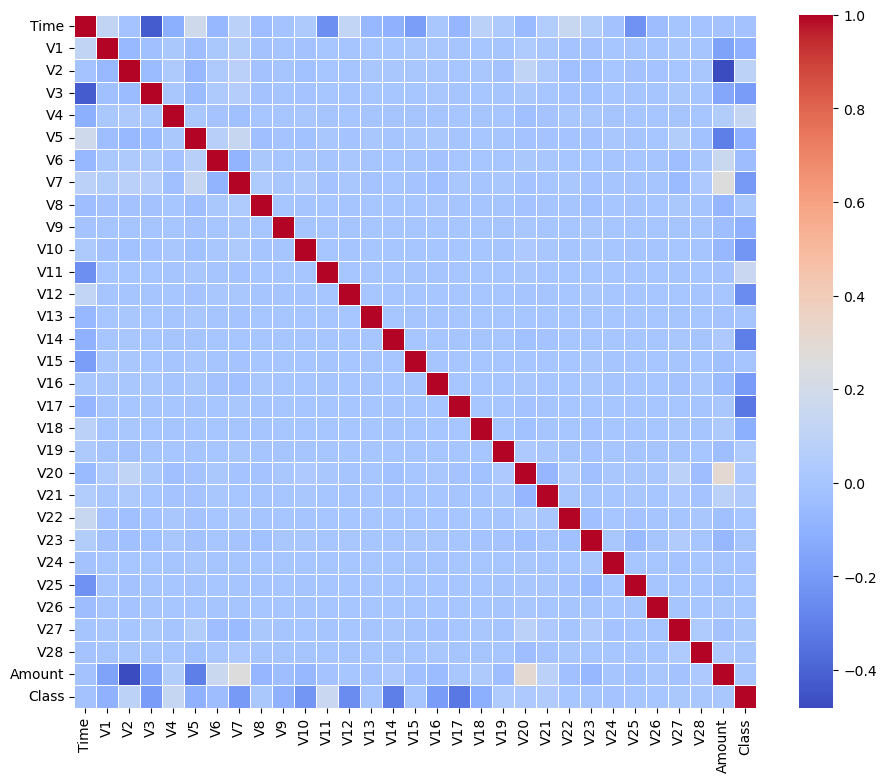

In [43]:
# Assuming 'df' is your DataFrame and it's already loaded with data.
# Calculate the correlation matrix
corr =grouped_amountlow_df[col1].corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a heatmap
sns.heatmap(corr, annot=False, ax=ax, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


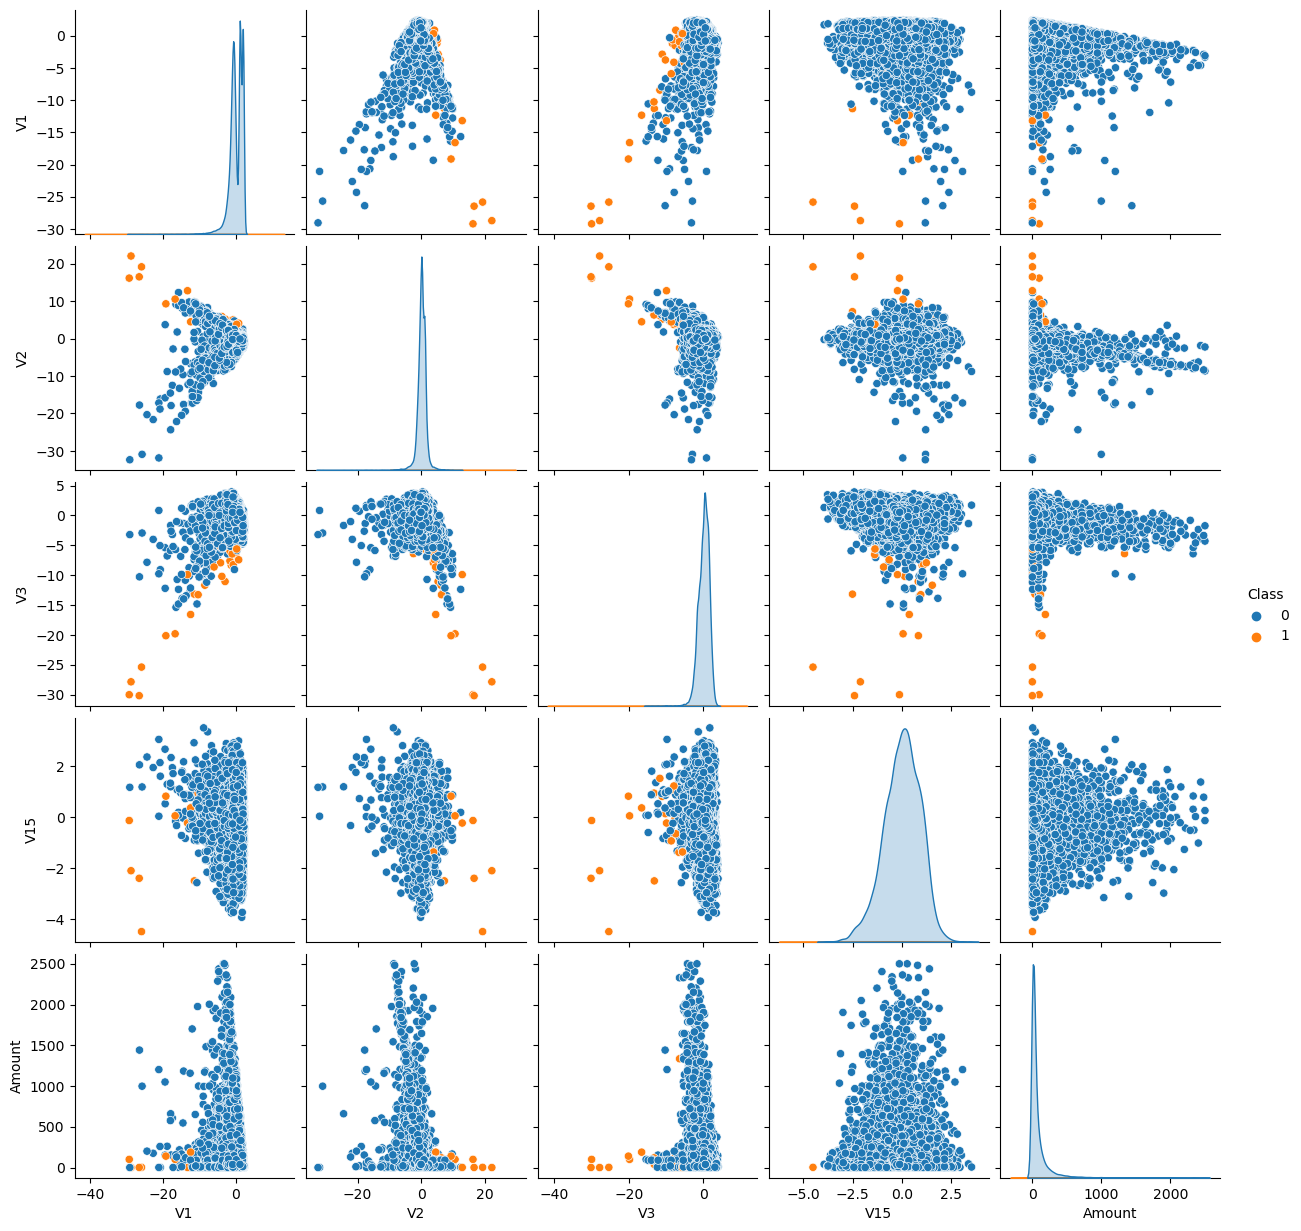

In [44]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


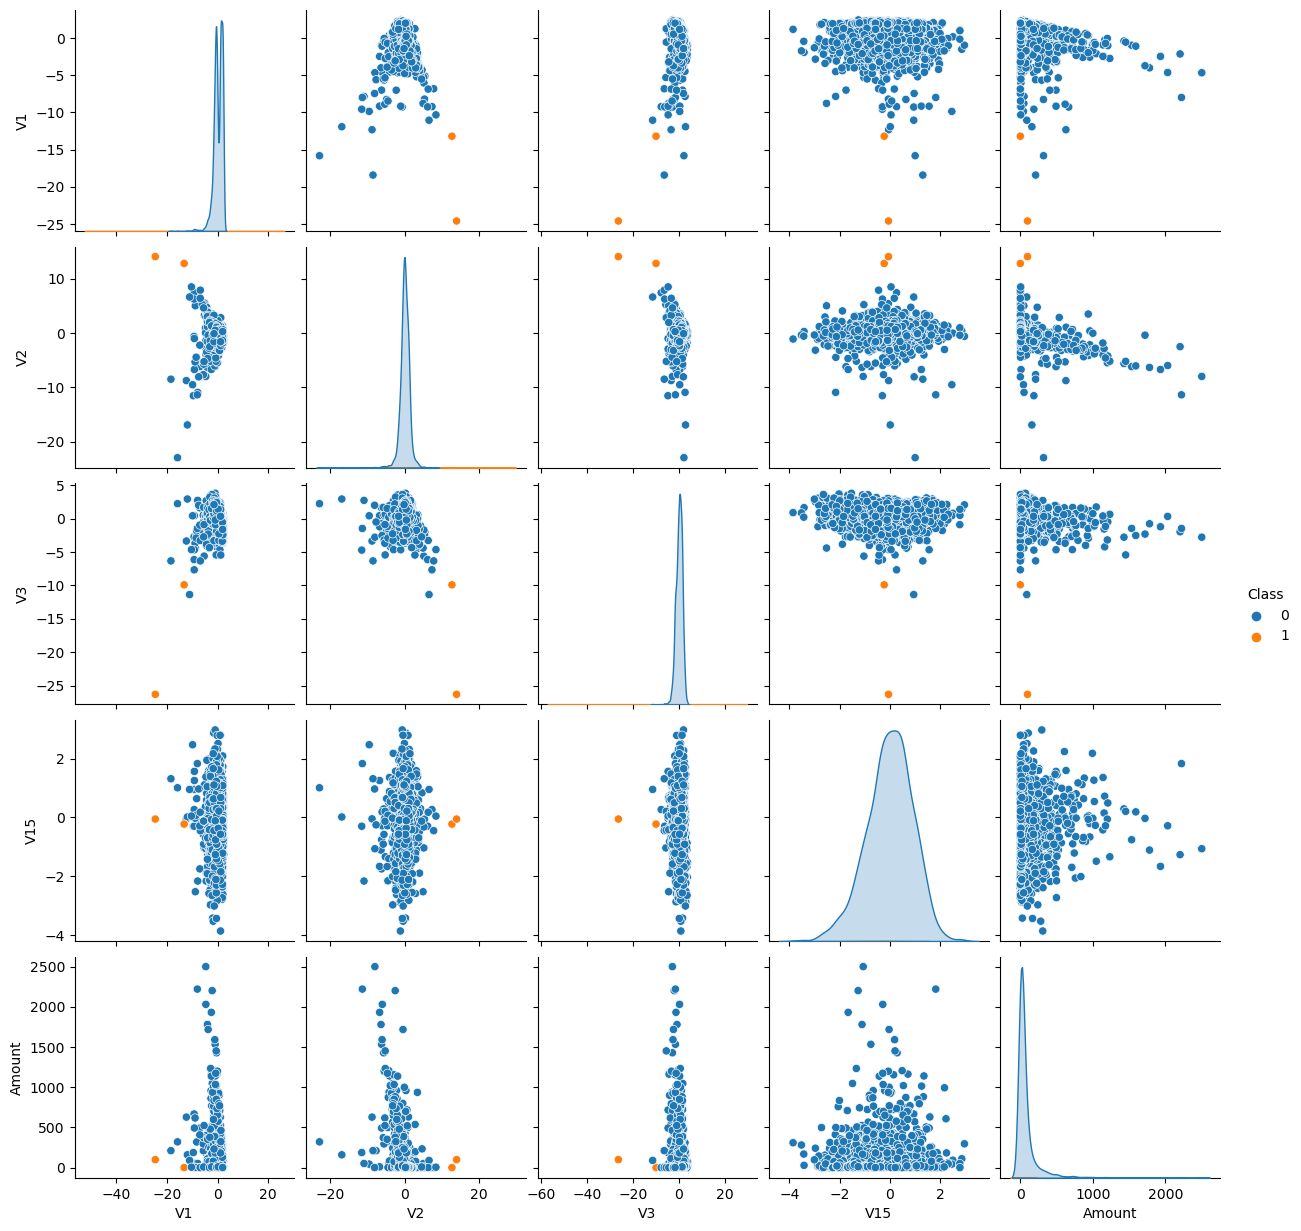

In [45]:
sns.pairplot(grouped_amountlow_df[col2].sample(frac = 0.01), hue = 'Class')
plt.show()

In [46]:
col3 = ['V10', 'V12', 'V20', 'V27','Amount',
       'Class']


c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


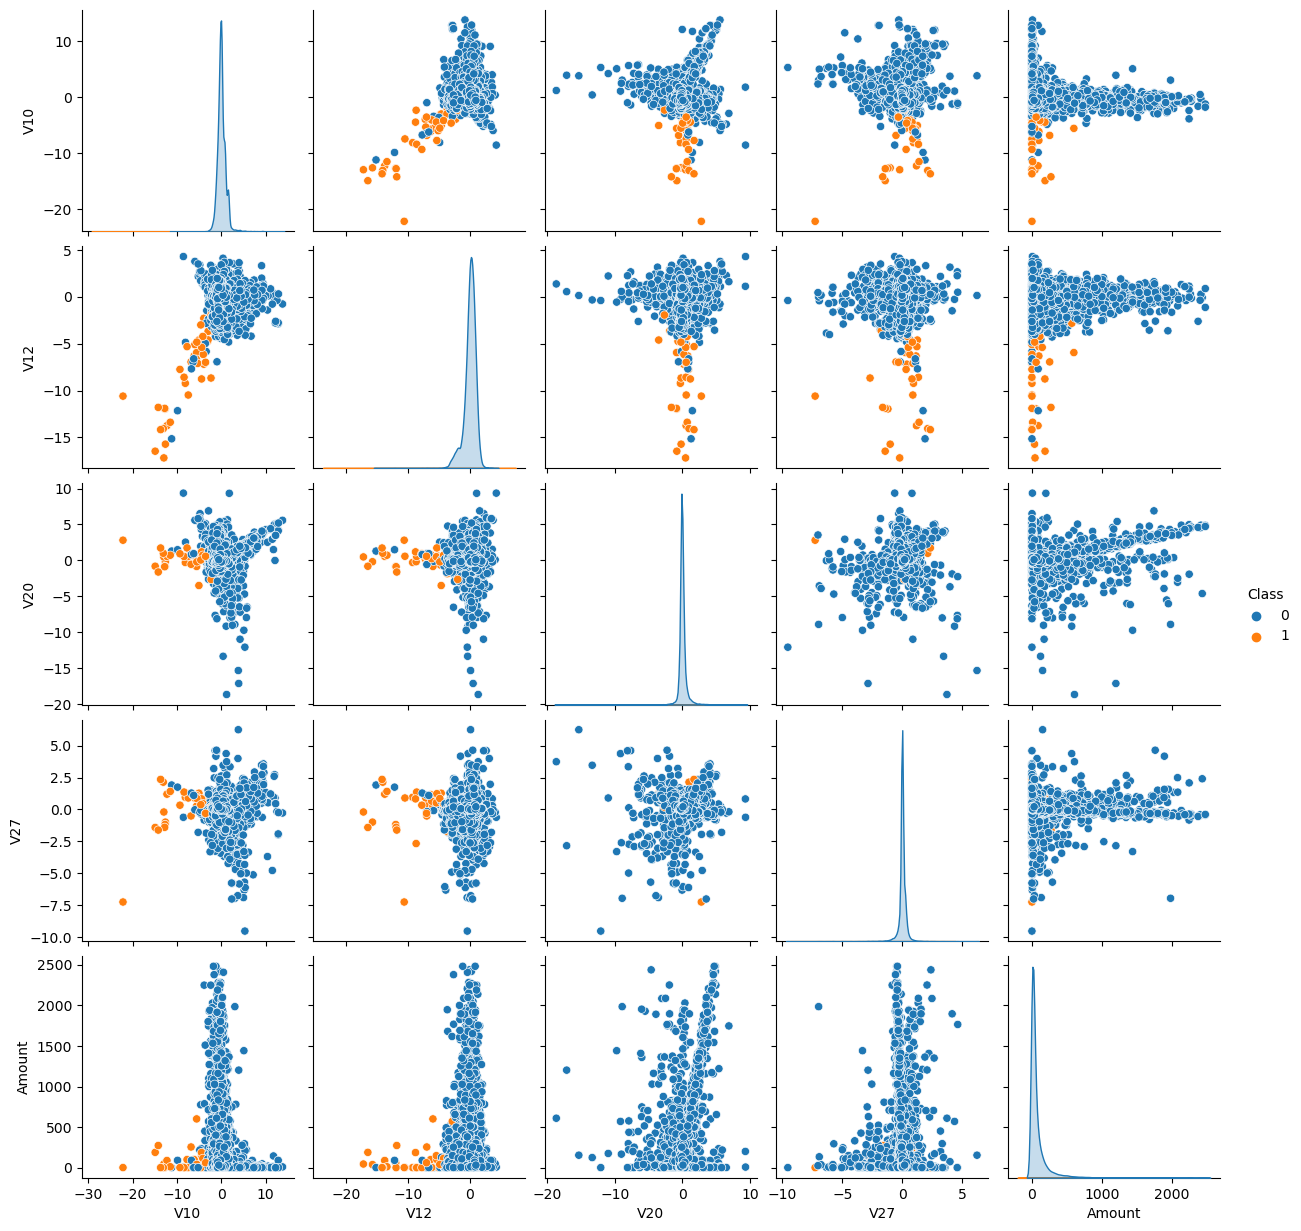

In [47]:
sns.pairplot(grouped_amountlow_df[col3].sample(frac = 0.1), hue = 'Class')
plt.show()

In [48]:
col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']


In [49]:
sns.pairplot(grouped_amountlow_df[col4].sample(frac = 0.1), hue = 'Class')
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


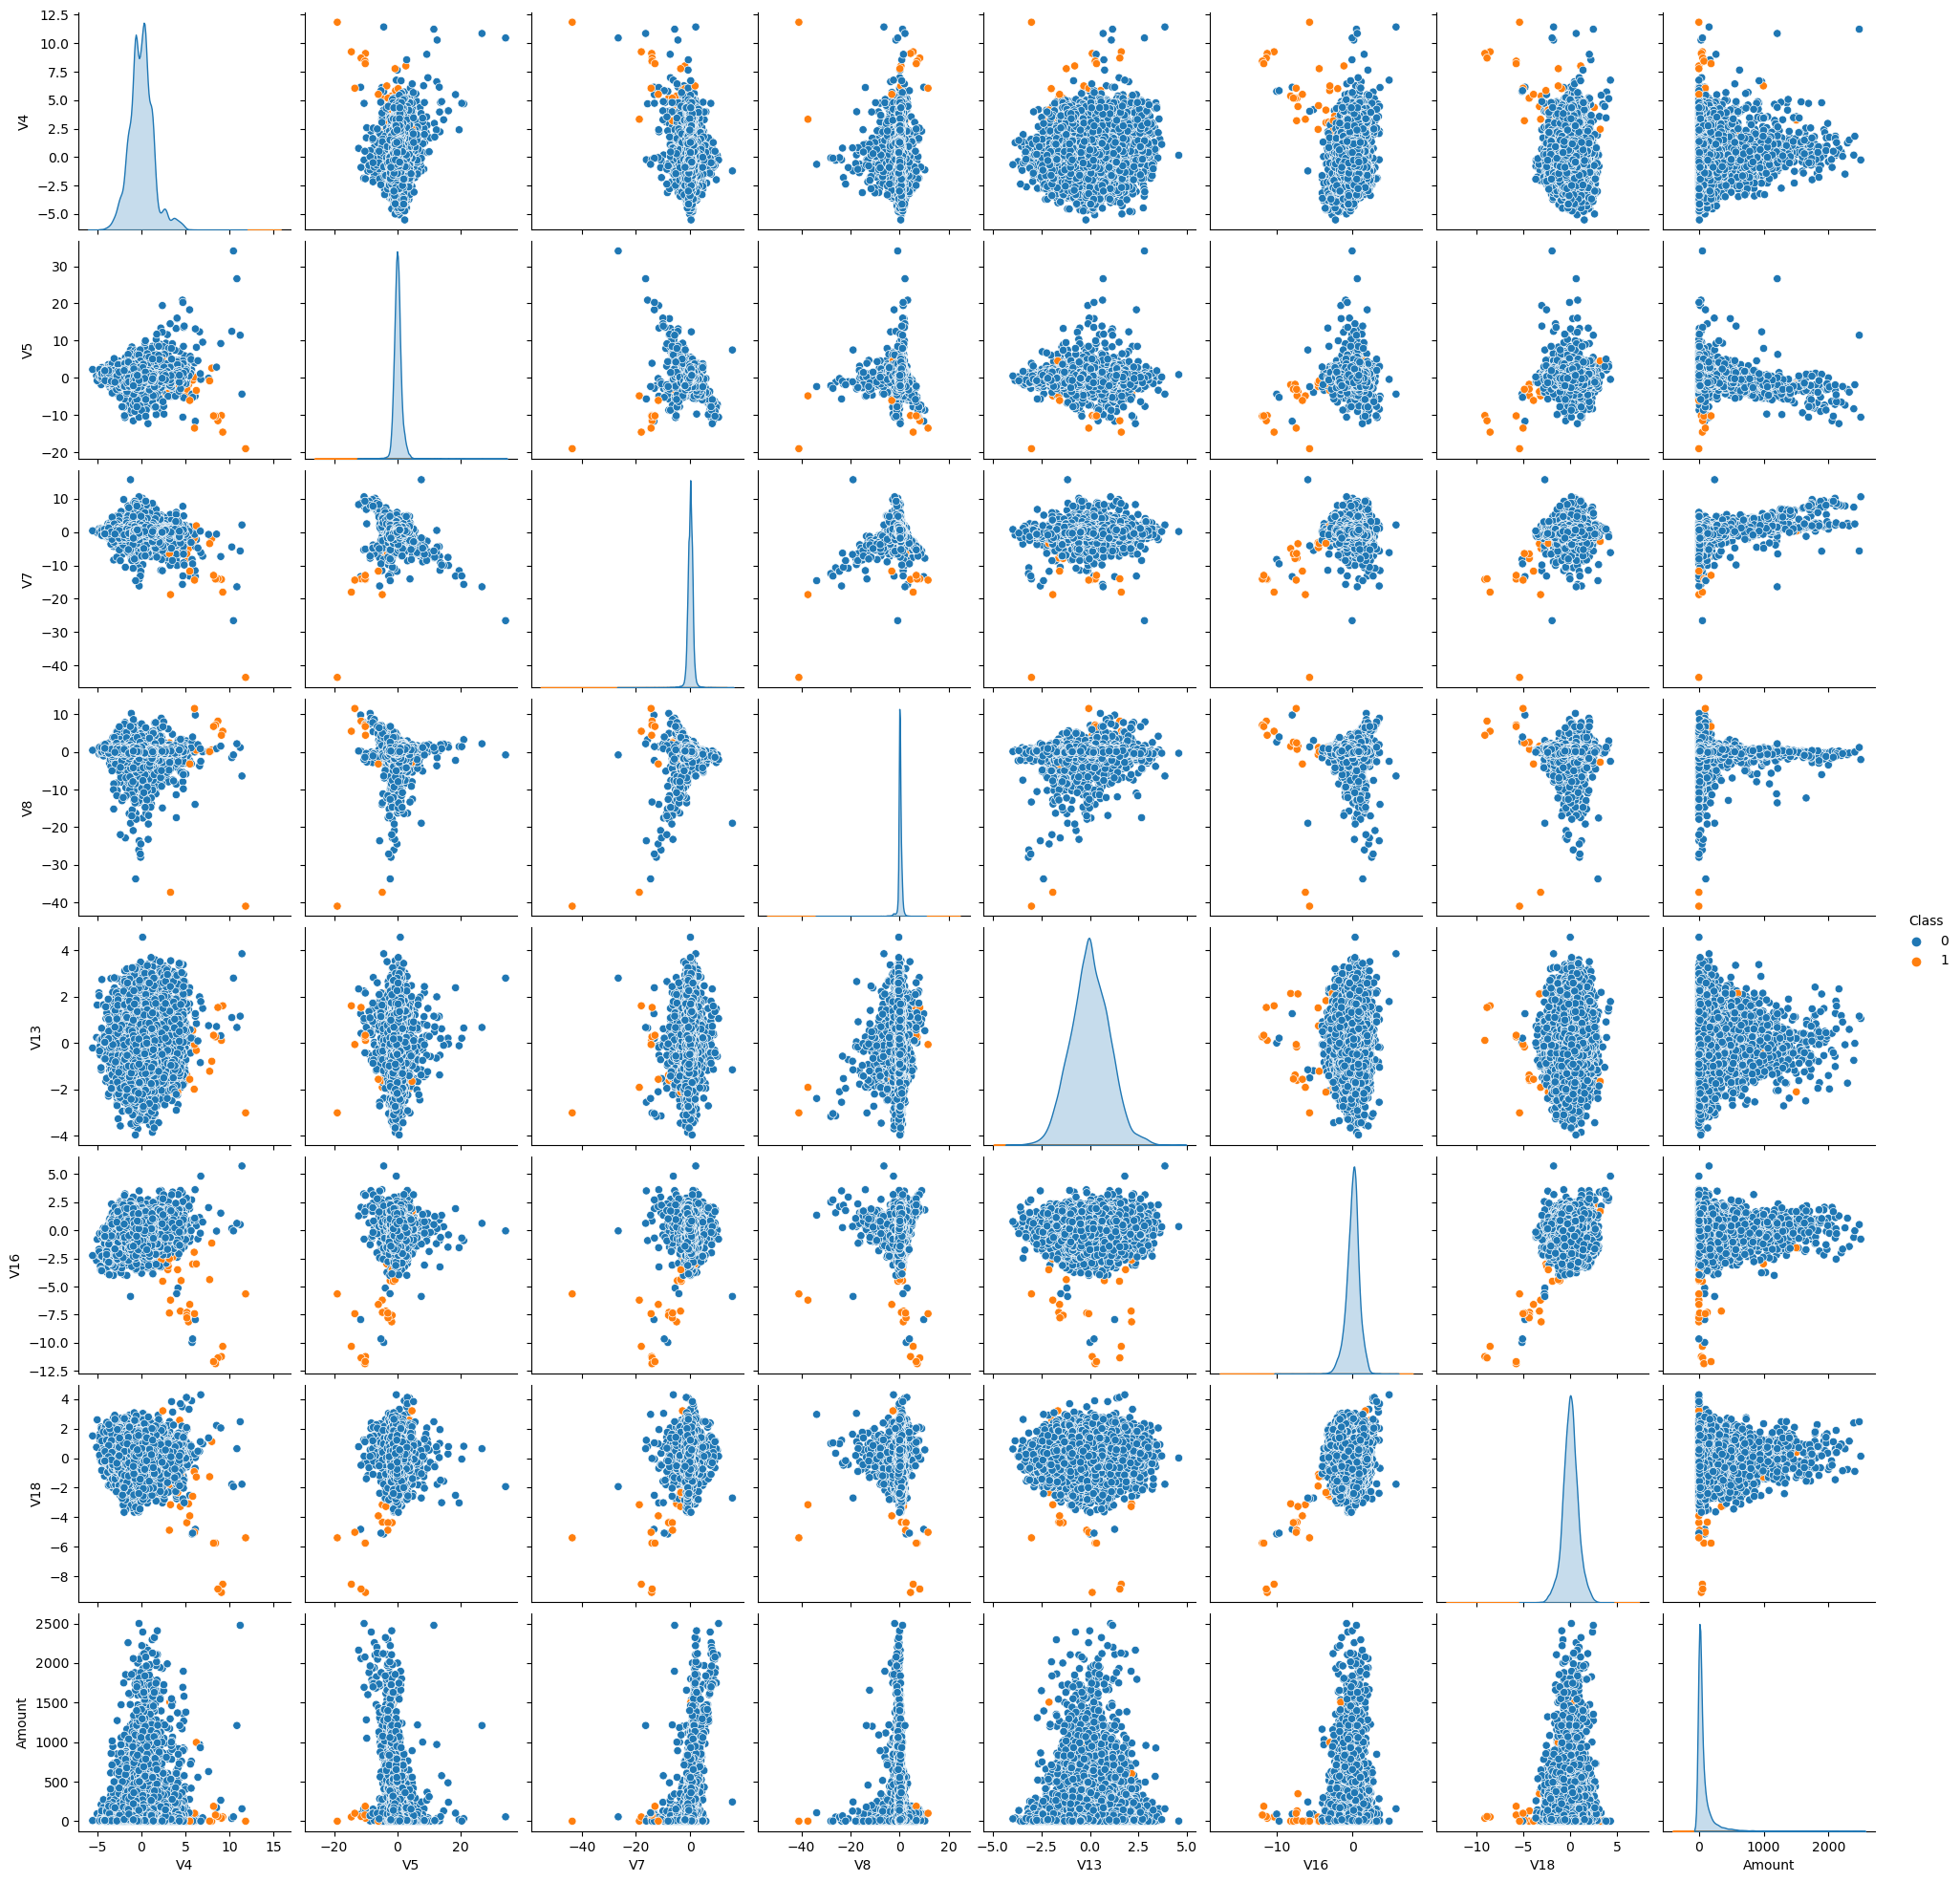

In [50]:
sns.pairplot(grouped_amountlow_df[col5].sample(frac = 0.1), hue = 'Class')
plt.show()

c:\Users\Soumi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


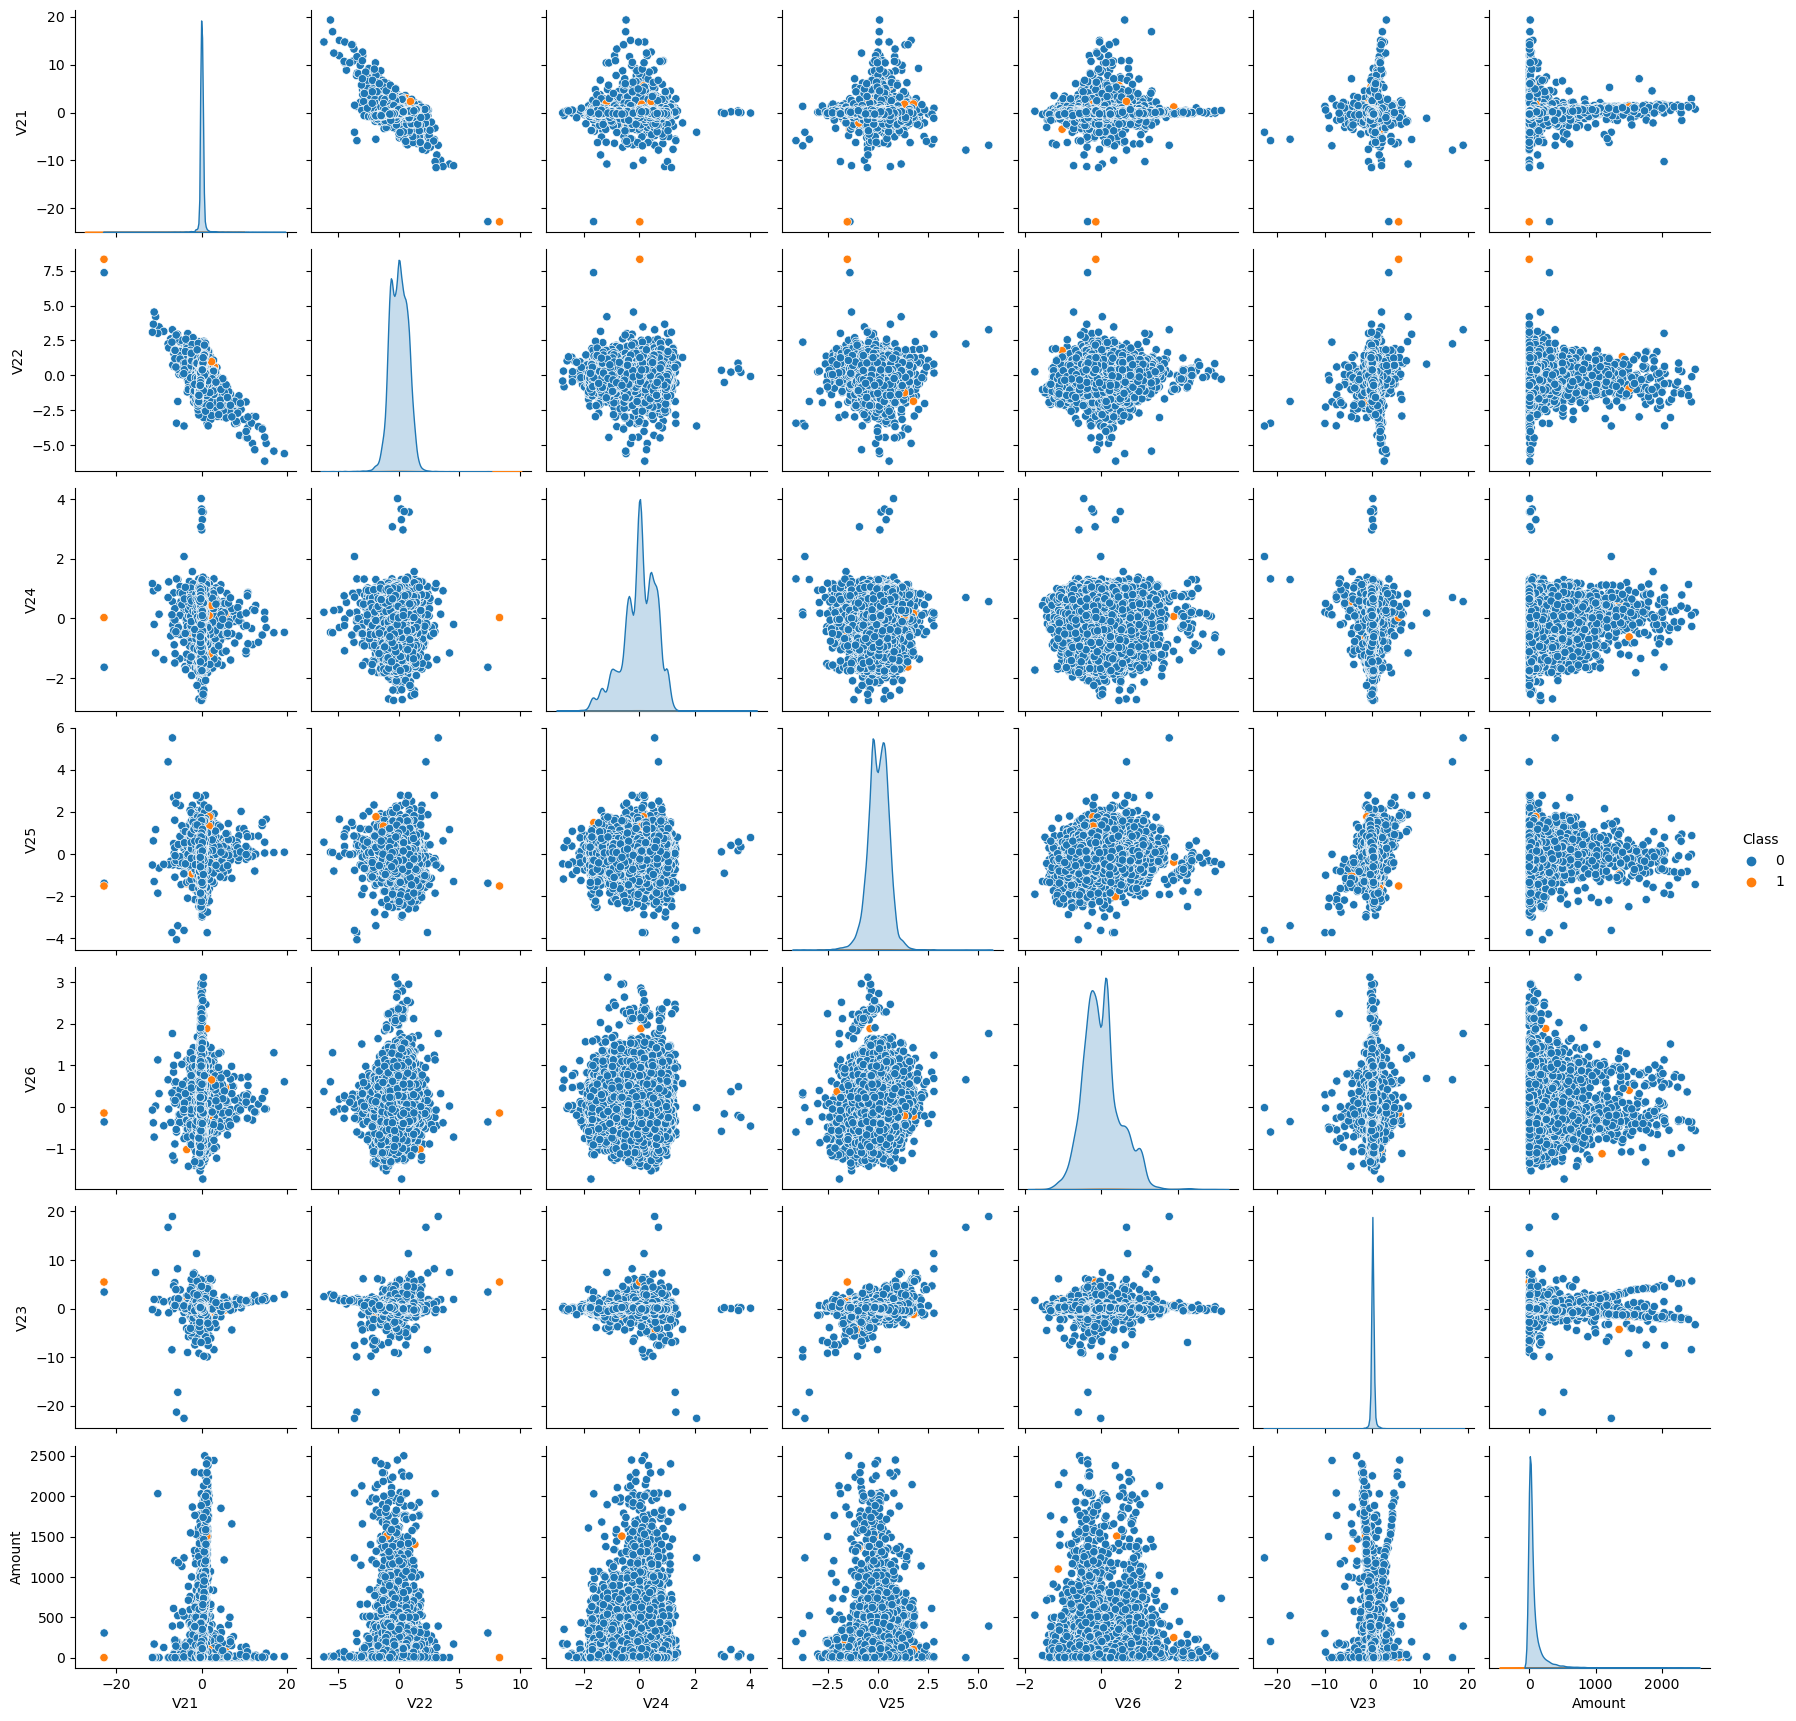

In [51]:
sns.pairplot(grouped_amountlow_df[col6].sample(frac = 0.1), hue = 'Class')
plt.show()

In [52]:
col5 = ['V4', 'V5', 'V7', 'V8','V13','V16','V18', 'Amount',
       'Class']

col6 = ['V21', 'V22', 'V24', 'V25','V26','V23', 'Amount',
       'Class']

col4 = ['V11', 'V14', 'V28', 'V17','V6','V9','V6','Amount',
       'Class']

col2 = ['V1', 'V2', 'V3', 'V15','Amount',
       'Class']

*two group*

In [53]:
grouped_amount_class_df = creditcard_df.groupby(['Amount_Group', 'Class'])

In [54]:
grouped_amount_class_df.size()

Amount_Group  Class
0-2500        0        283875
              1           492
2500-above    0           440
dtype: int64

In [55]:
grouped_amount_class_df.sample(3)

Time         V1         V2        V3        V4        V5  \
138970   82942.0  -1.062286   0.316680  1.356009 -0.156354  1.449689   
84466    60321.0  -0.437126   1.117489  1.394153 -0.066973  0.262831   
14002    24892.0   1.096722   0.255776  1.082324  1.375560 -0.511862   
243749  152058.0  -3.576362   3.299436 -7.460433  7.783634 -0.398549   
6870      8757.0  -1.863756   3.442644 -4.468260  2.805336 -2.118412   
81186    58822.0  -4.384221   3.264665 -3.077158  3.403594 -1.938075   
2453      2019.0  -3.687481  -8.746635 -2.057885  1.858936 -3.353004   
216971  140711.0  -4.489081 -12.869402 -4.001162  1.101210 -5.238045   
266105  162190.0 -13.603553 -19.337125 -0.483215  9.074932  3.980815   

              V6        V7        V8        V9       V10       V11       V12  \
138970  1.501096  0.315936  0.718387 -0.682401 -0.625148  1.518639  0.331814   
84466  -0.279661  0.605167  0.141500 -0.826465 -0.416764  2.063752  1.302417   
14002  -0.306692 -0.297760 -0.105118  1.430725 -0.475379  1.197890 -1.602454   
243749 -1.968441 -3.110476 -0.328404 -1.574363 -2.497561  4.604170 -9.001915   
6870   -2.332285 -4.261237  1.701682 -1.439396 -6.999907  6.316210 -8.670818   
81186  -1.221081 -3.310317 -1.111975 -1.977593 -3.288204  2.886091 -6.848978   
2453    1.580542  2.399114 -0.318630 -1.045750 -0.458158  1.373242  0.982004   
216971  1.469707  2.544407 -0.712393 -0.927547 -0.055977 -1.368732 -1.292293   
266105 -1.381985  0.094838  0.948402 -1.555340  0.071043 -0.318240 -0.607916   

             V13        V14       V15       V16       V17       V18       V19  \
138970 -1.134443   0.694634  0.811754 -0.626458  0.165730 -1.173942 -2.151910   
84466   0.994309  -0.394764  0.318681  0.179418  0.051888 -0.283682 -0.243308   
14002   2.660419   1.421141  0.626979 -0.068140  0.483454 -0.193536 -1.270270   
243749 -1.276324 -13.969471  1.256945 -4.491629 -5.969987 -1.274666  1.147784   
6870    0.316024  -7.417712 -0.436537 -3.652802 -6.293145 -1.243248  0.364810   
81186  -1.029235  -7.460103  0.055906 -4.334783 -9.874560 -3.541903 -0.531559   
2453    0.610656   0.573200  0.402425 -1.464114  0.444155  1.137809 -2.053805   
216971  0.732926   0.072782  1.687845  0.979165 -0.027760  1.671761 -1.745866   
266105  0.268347   0.765498  1.516408  1.247797 -0.502231  3.175909  0.804698   

             V20       V21       V22       V23       V24       V25       V26  \
138970 -0.182432  0.344877  0.878644 -0.085594 -1.376512 -0.061677 -0.310796   
84466   0.149250 -0.160074 -0.341347  0.012901  0.200809 -0.256702  0.068128   
14002  -0.099547  0.056988  0.493281 -0.034955  0.370518  0.417534 -0.331133   
243749 -0.181455  0.540731  0.719526  0.379249 -0.616962 -0.442811  0.359841   
6870    0.360924  0.667927 -0.516242 -0.012218  0.070614  0.058504  0.304883   
81186  -0.141533  2.076383 -0.990303 -0.330358  0.158378  0.006351 -0.493860   
2453    4.596930  1.230193 -1.573274 -2.122351 -0.141325 -0.838373  0.251148   
216971  6.709973  2.177755 -1.262631 -2.796612  0.407080 -1.816850 -0.489382   
266105  9.476444  2.870794 -0.272079  8.462485 -0.207108  1.615177  0.444293   

             V27       V28   Amount  Class Amount_Group  
138970  0.130986  0.092511    34.90      0       0-2500  
84466   0.265587  0.088825     2.58      0       0-2500  
14002   0.035792  0.031180    30.24      0       0-2500  
243749 -2.651825  0.422184     1.00      1       0-2500  
6870    0.418012  0.208858     1.00      1       0-2500  
81186  -1.537652 -0.994022    45.64      1       0-2500  
2453   -0.440547  0.445717  2540.42      0   2500-above  
216971 -0.595373  0.583736  3510.95      0   2500-above  
266105 -1.253111  0.549336  2723.04      0   2500-above

In [56]:
grouped_amountlow_class1_df = grouped_amount_class_df.get_group(('0-2500', 1))

In [57]:
grouped_amountlow_class1_df.describe()

Time          V1          V2          V3          V4  \
count     492.000000  492.000000  492.000000  492.000000  492.000000   
mean    80746.806911   -4.771948    3.623778   -7.033281    4.542029   
std     47835.365138    6.783687    4.291216    7.110937    2.873318   
min       406.000000  -30.552380   -8.402154  -31.103685   -1.313275   
25%     41241.500000   -6.036063    1.188226   -8.643489    2.373050   
50%     75568.500000   -2.342497    2.717869   -5.075257    4.177147   
75%    128483.000000   -0.419200    4.971257   -2.276185    6.348729   
max    170348.000000    2.132386   22.057729    2.250210   12.114672   

               V5          V6          V7          V8          V9         V10  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -3.151225   -1.397737   -5.568731    0.570636   -2.581123   -5.676883   
std      5.372468    1.858124    7.206773    6.797831    2.500896    4.897341   
min    -22.105532   -6.406267  -43.557242  -41.044261  -13.434066  -24.588262   
25%     -4.792835   -2.501511   -7.965295   -0.195336   -3.872383   -7.756698   
50%     -1.522962   -1.424616   -3.034402    0.621508   -2.208768   -4.578825   
75%      0.214562   -0.413216   -0.945954    1.764879   -0.787850   -2.614184   
max     11.095089    6.474115    5.802537   20.007208    3.353525    4.031435   

              V11         V12         V13         V14         V15         V16  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean     3.800173   -6.259393   -0.109334   -6.971723   -0.092929   -4.139946   
std      2.678605    4.654458    1.104518    4.278940    1.049915    3.865035   
min     -1.702228  -18.683715   -3.127795  -19.214325   -4.498945  -14.129855   
25%      1.973397   -8.688177   -0.979117   -9.692723   -0.643539   -6.562915   
50%      3.586218   -5.502530   -0.065566   -6.729720   -0.057227   -3.549795   
75%      5.307078   -2.974088    0.672964   -4.282821    0.609189   -1.226043   
max     12.018913    1.375941    2.815440    3.442422    2.471358    3.139656   

              V17         V18         V19         V20         V21         V22  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -6.665836   -2.246308    0.680659    0.372319    0.713588    0.014049   
std      6.970618    2.899366    1.539853    1.346635    3.869304    1.494602   
min    -25.162799   -9.498746   -3.681904   -4.128186  -22.797604   -8.887017   
25%    -11.945057   -4.664576   -0.299423   -0.171760    0.041787   -0.533764   
50%     -5.302949   -1.664346    0.646807    0.284693    0.592146    0.048434   
75%     -1.341940    0.091772    1.649318    0.822445    1.244611    0.617474   
max      6.739384    3.790316    5.228342   11.059004   27.202839    8.361985   

              V23         V24         V25         V26         V27         V28  \
count  492.000000  492.000000  492.000000  492.000000  492.000000  492.000000   
mean    -0.040308   -0.105130    0.041449    0.051648    0.170575    0.075667   
std      1.579642    0.515577    0.797205    0.471679    1.376766    0.547291   
min    -19.254328   -2.028024   -4.781606   -1.152671   -7.263482   -1.869290   
25%     -0.342175   -0.436809   -0.314348   -0.259416   -0.020025   -0.108868   
50%     -0.073135   -0.060795    0.088371    0.004321    0.394926    0.146344   
75%      0.308378    0.285328    0.456515    0.396733    0.826029    0.381152   
max      5.466230    1.091435    2.208209    2.745261    3.052358    1.779364   

            Amount  Class  
count   492.000000  492.0  
mean    122.211321    1.0  
std     256.683288    0.0  
min       0.000000    1.0  
25%       1.000000    1.0  
50%       9.250000    1.0  
75%     105.890000    1.0  
max    2125.870000    1.0

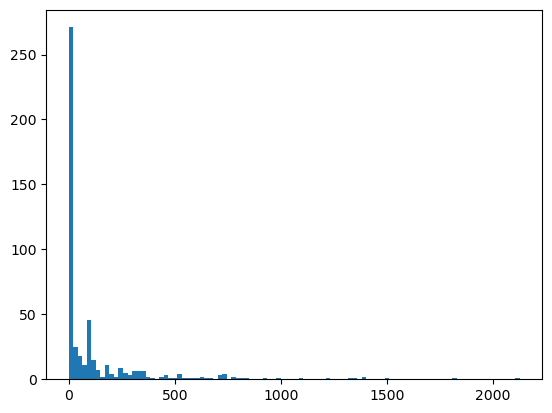

In [58]:
plt.hist(grouped_amountlow_class1_df['Amount'], bins=100)
plt.show()

We can observe that fruad transaction via credit cards occurs at very low range of amount around 100 dollars

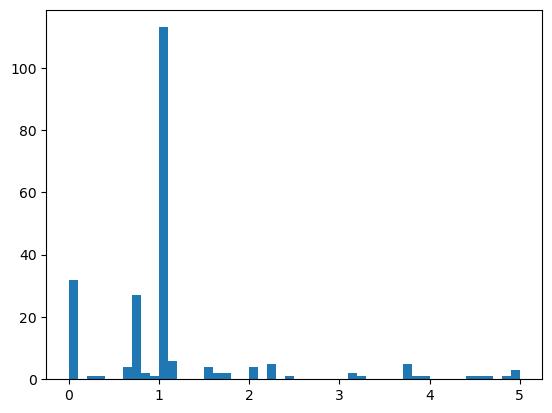

In [59]:
plt.hist(grouped_amountlow_class1_df['Amount'], range=(0,5), bins=50)
plt.show()

For fruadlent transaction mode of amount =1 dollar

In [60]:
grouped_amountlow_class0_df = grouped_amount_class_df.get_group(('0-2500', 0))

In [61]:
grouped_amountlow_class0_df.describe()

Time             V1             V2             V3  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean    94842.693002       0.019252       0.011278       0.020141   
std     47486.591102       1.896891       1.543058       1.438756   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     54237.500000      -0.913512      -0.595753      -0.878702   
50%     84715.000000       0.023871       0.065687       0.184441   
75%    139340.000000       1.316972       0.801707       1.029929   
max    172792.000000       2.454930      18.902453       9.382558   

                  V4             V5             V6             V7  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.012053       0.017056      -0.003995      -0.003225   
std         1.392545       1.279867       1.299465       1.076977   
min        -5.683171     -23.669726     -26.160506     -31.764946   
25%        -0.851194      -0.686058      -0.767394      -0.552336   
50%        -0.024309      -0.052033      -0.274552       0.039884   
75%         0.733815       0.613252       0.395629       0.568357   
max        16.491217      34.801666      16.614054      21.014587   

                  V8             V9            V10            V11  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.002065       0.005339       0.012705      -0.006953   
std         1.153434       1.088449       1.040267       1.002772   
min       -73.216718      -6.290730     -14.741096      -4.797473   
25%        -0.207385      -0.639440      -0.530921      -0.763604   
50%         0.022636      -0.049409      -0.090828      -0.035154   
75%         0.326947       0.598685       0.456700       0.735867   
max        18.709255      15.594995      23.745136      10.002190   

                 V12            V13            V14            V15  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.011214      -0.000310       0.011228      -0.000451   
std         0.945446       0.994830       0.896178       0.914423   
min       -15.144988      -5.791881     -18.392091      -4.391307   
25%        -0.401400      -0.648514      -0.422857      -0.583170   
50%         0.141938      -0.013859       0.051350       0.047831   
75%         0.619288       0.661984       0.492874       0.648318   
max         7.848392       4.569009      10.526766       5.825654   

                 V16            V17            V18            V19  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean        0.006018       0.011570       0.003407       0.000122   
std         0.842411       0.749273       0.823714       0.810010   
min       -10.115560     -17.098444      -5.366660      -4.932733   
25%        -0.465782      -0.482640      -0.497319      -0.454861   
50%         0.066979      -0.064971      -0.002997       0.003967   
75%         0.522904       0.399787       0.500424       0.457997   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V21            V22            V23  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.007283      -0.003176       0.001888       0.002227   
std         0.684865       0.707172       0.719780       0.555094   
min       -23.646890     -34.830382      -8.593642     -36.666000   
25%        -0.211797      -0.228572      -0.541013      -0.161164   
50%        -0.062898      -0.030150       0.007580      -0.010958   
75%         0.131507       0.184764       0.528964       0.147489   
max        16.756448      22.614889      10.503090      22.083545   

                 V24            V25            V26            V27  \
count  283875.000000  283875.000000  283875.000000  283875.000000   
mean       -0.000027       0.000876       0.000179      -0.000799   
std         0.605311       0.516503       0.481869       0.387242   
min     

In [62]:
grouped_amountlow_class0_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
263192  160837.0 -0.141100  0.502559  1.156602 -0.246742  0.052708  0.302602   
204740  135423.0 -1.472486  1.828457 -1.552570 -0.122848 -0.200327 -1.485619   
56758    47578.0  1.221053 -0.438578  0.288552 -0.226693 -0.842030 -0.766832   
271381  164549.0  2.040753 -0.055475 -1.162457  0.218520  0.138845 -0.687227   
8753     11910.0 -0.834262  0.860988  2.175514 -0.516210  1.710435  0.404226   

              V7        V8        V9       V10       V11       V12       V13  \
263192  0.080528  0.108638  0.062857 -0.219792  0.417984  1.089856  1.144537   
204740 -0.019380  0.974592 -0.348837 -1.276000 -1.246994 -0.298969 -0.634774   
56758  -0.177016 -0.137043 -1.394869  0.874796  1.289888  0.665180  0.206970   
271381  0.129246 -0.212170  0.185033  0.219202  0.805302  1.438453  0.818862   
8753    1.481363 -1.211927  1.431377  0.874623  1.730929 -2.227659  2.795718   

             V14       V15       V16       V17       V18       V19       V20  \
263192 -0.342067 -0.388977  0.143249 -0.682487  0.666628  0.817882  0.031247   
204740  0.225920  0.690061  0.408986  0.937955  0.967817 -0.057495 -0.386357   
56758   0.483131  0.099326 -1.077180 -0.317274  0.966023 -0.390270 -0.377000   
271381  0.297142 -0.722912  0.147799 -0.699741 -0.365914  0.550528 -0.150960   
8753    0.291450 -0.339009  0.226216 -0.971145  0.555804  0.739900  0.430149   

             V21       V22       V23       V24       V25       V26       V27  \
263192  0.357762  1.224165 -0.123484 -0.367710 -1.003669  0.566490  0.092871   
204740  0.415321  0.959241 -0.037118 -0.191974 -0.366552 -0.150108 -0.132424   
56758  -0.776810 -2.013367  0.281806  0.246156 -0.093258 -0.045087 -0.041398   
271381 -0.249031 -0.581796  0.278074 -0.314496 -0.259666  0.195572 -0.070018   
8753   -0.648246 -0.809072 -0.586648 -1.067970  0.160422 -0.021619 -1.117893   

             V28  Amount  Class Amount_Group  
263192  0.221926   11.50      0       0-2500  
204740  0.030386    2.36      0       0-2500  
56758   0.021875   66.00      0       0-2500  
271381 -0.071518    2.69      0       0-2500  
8753   -0.967816    8.98      0       0-2500

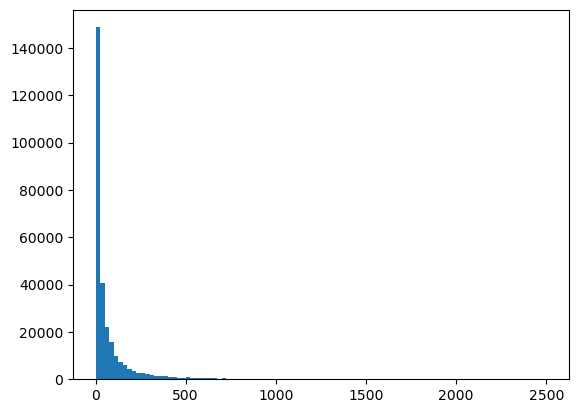

In [63]:
plt.hist(grouped_amountlow_class0_df['Amount'], bins=100)
plt.show()

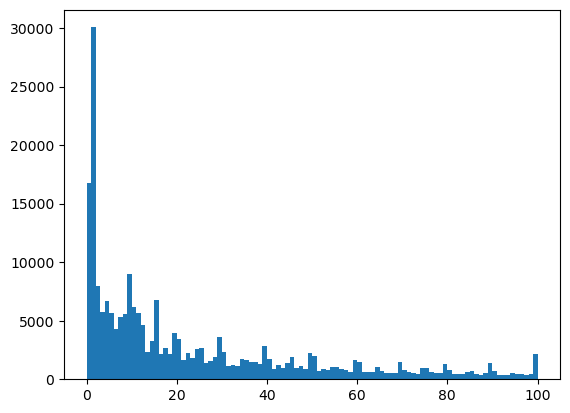

In [64]:
plt.hist(grouped_amountlow_class0_df['Amount'],range =(0,100),  bins=100)
plt.show()

Time
NF


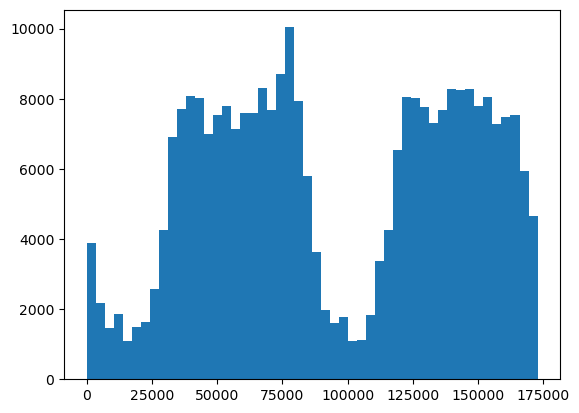

F


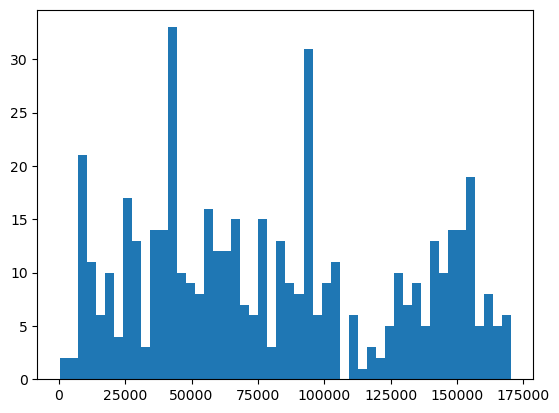

V1
NF


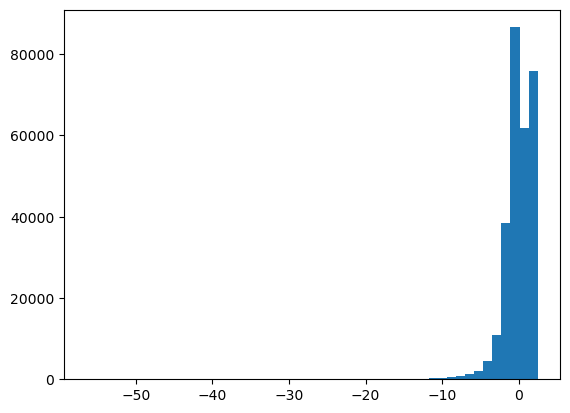

F


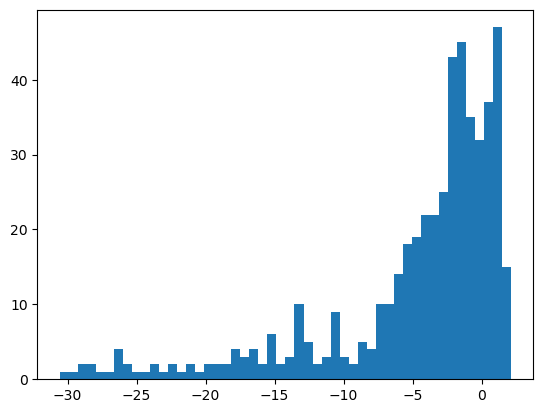

V2
NF


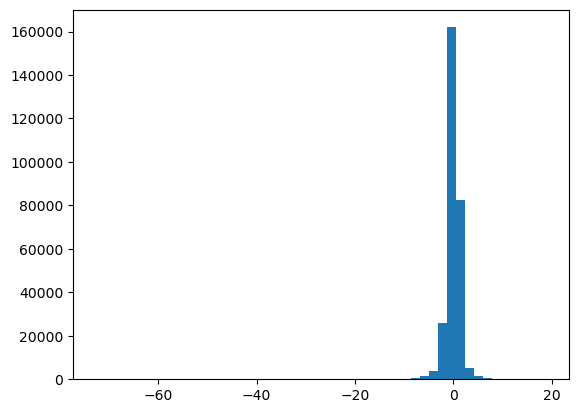

F


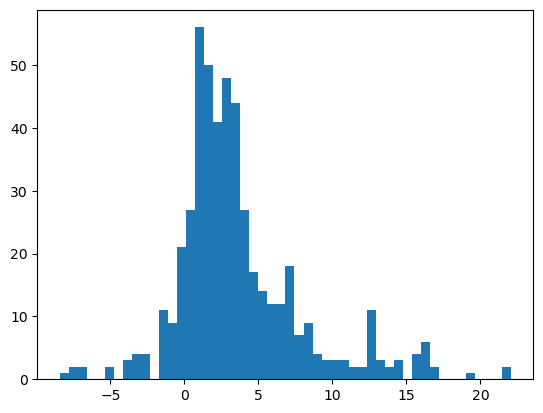

V3
NF


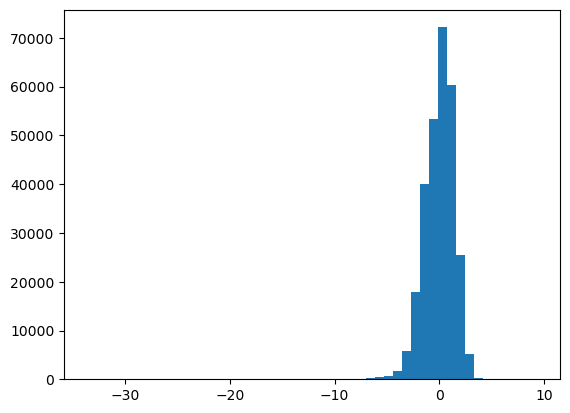

F


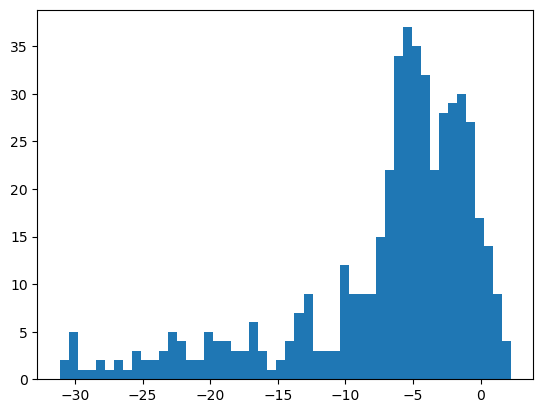

V4
NF


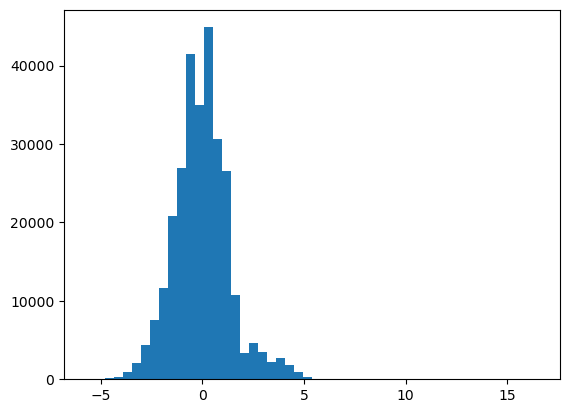

F


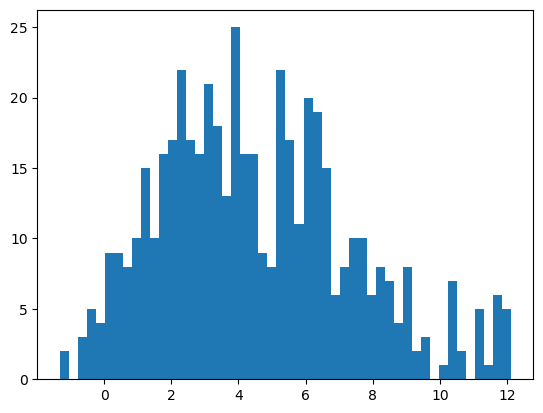

V5
NF


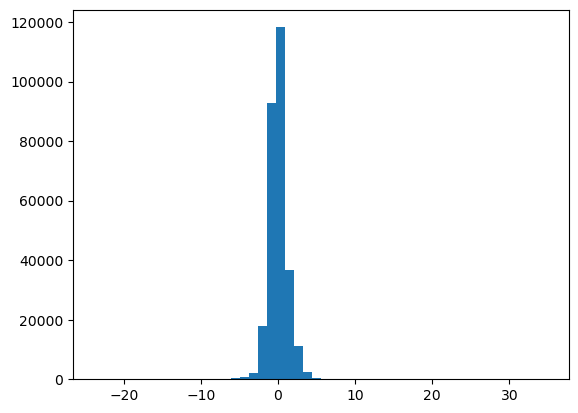

F


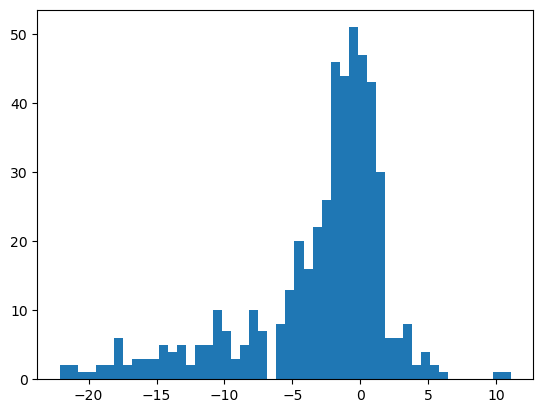

V6
NF


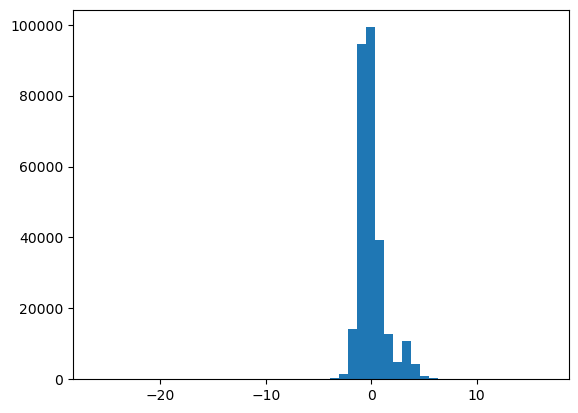

F


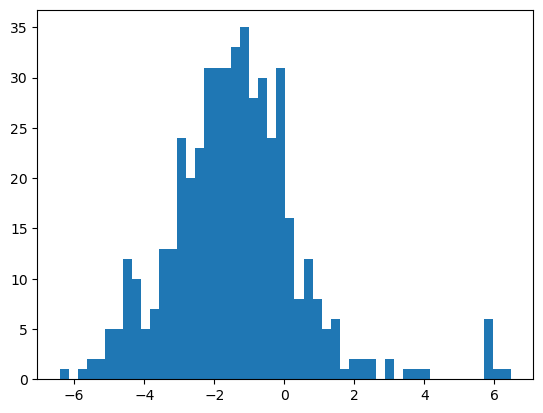

V7
NF


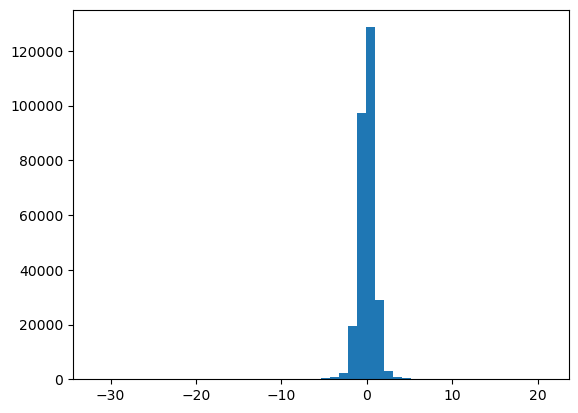

F


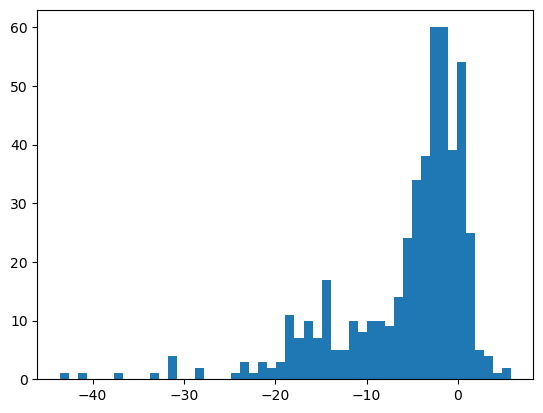

V8
NF


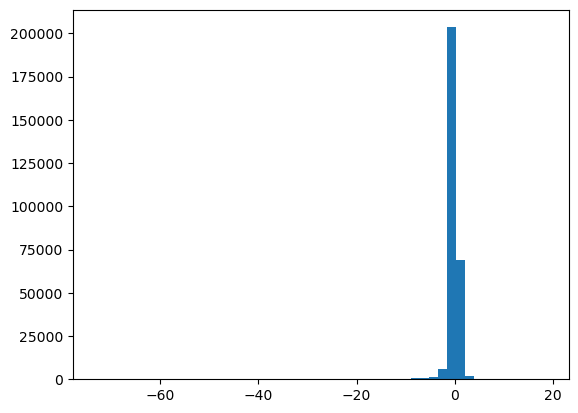

F


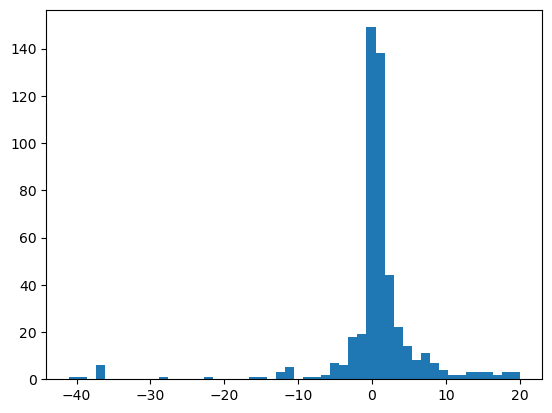

V9
NF


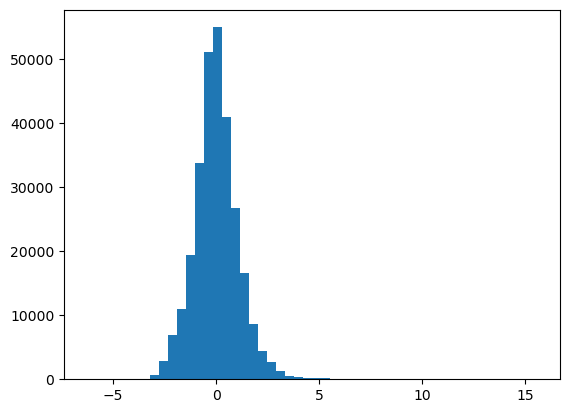

F


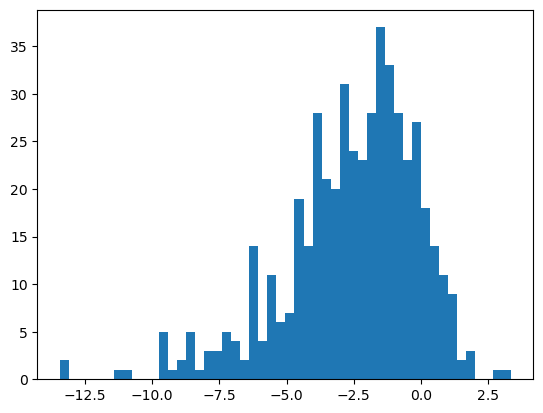

V10
NF


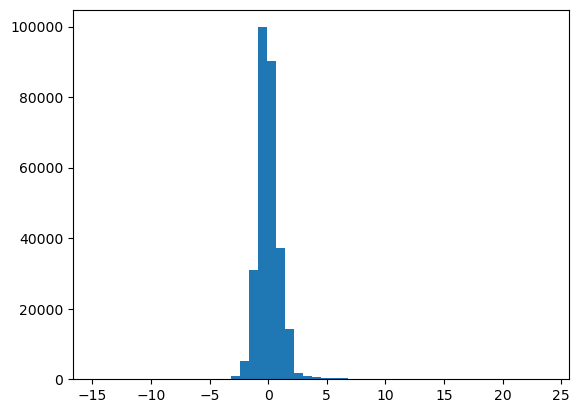

F


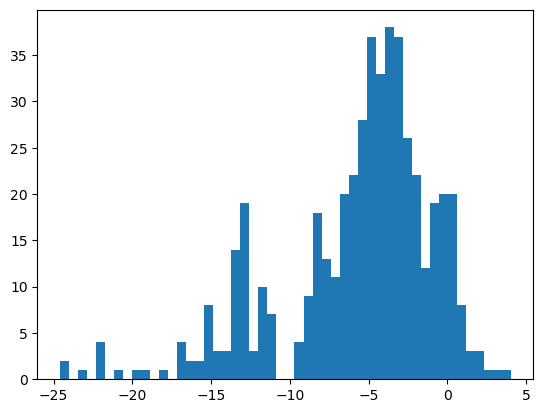

V11
NF


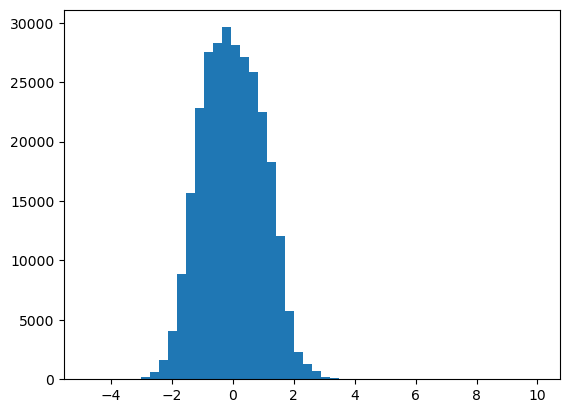

F


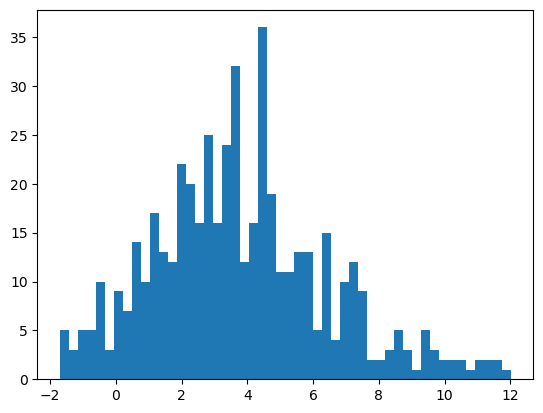

V12
NF


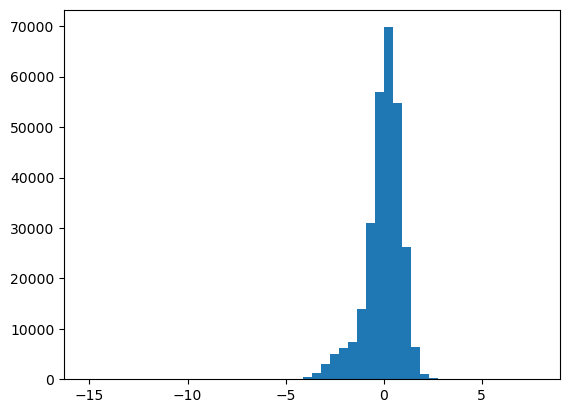

F


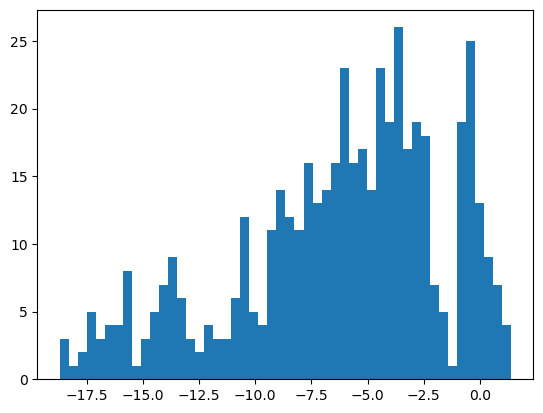

V13
NF


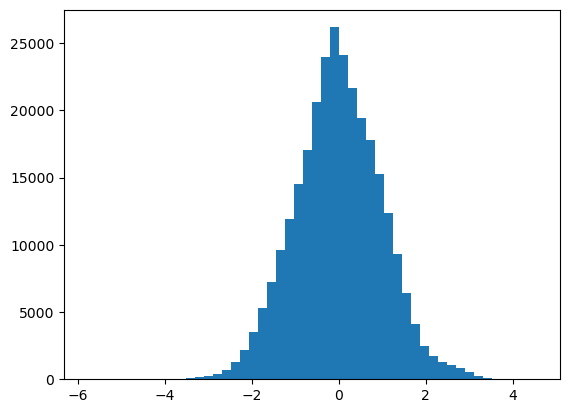

F


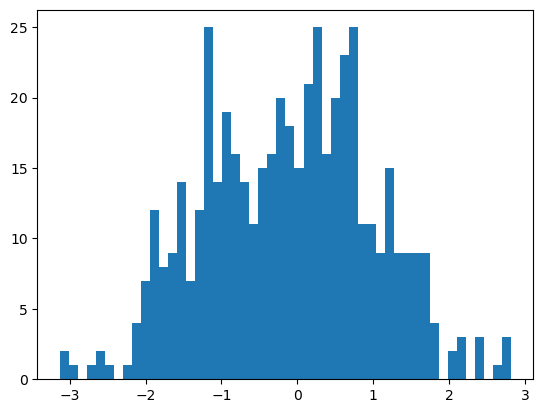

V14
NF


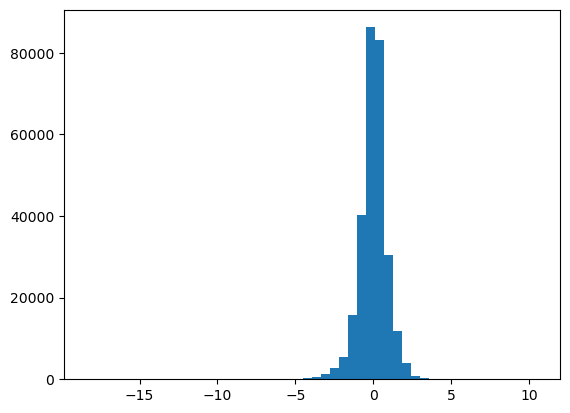

F


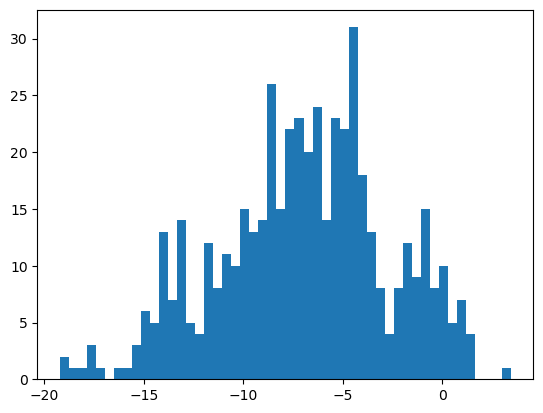

V15
NF


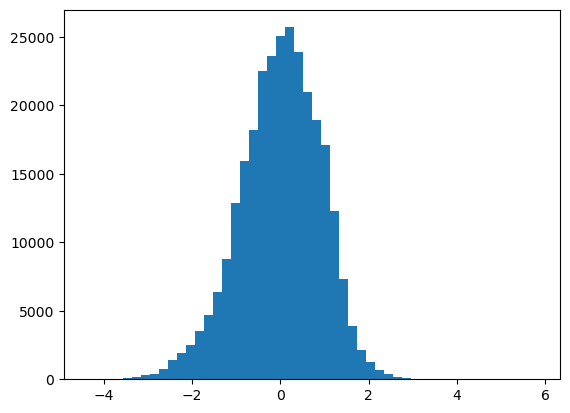

F


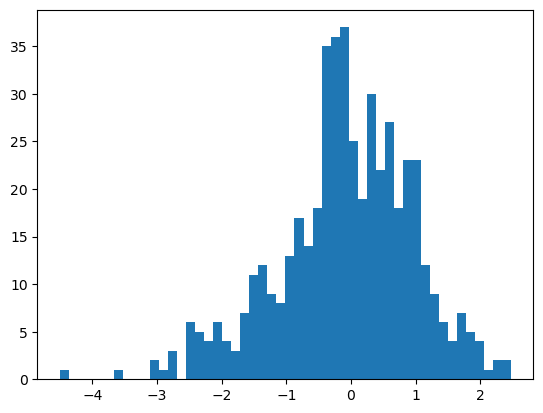

V16
NF


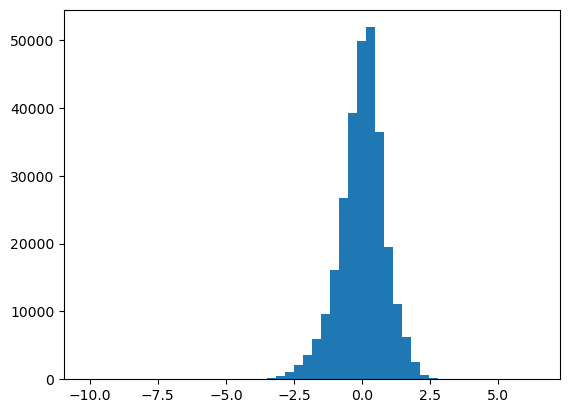

F


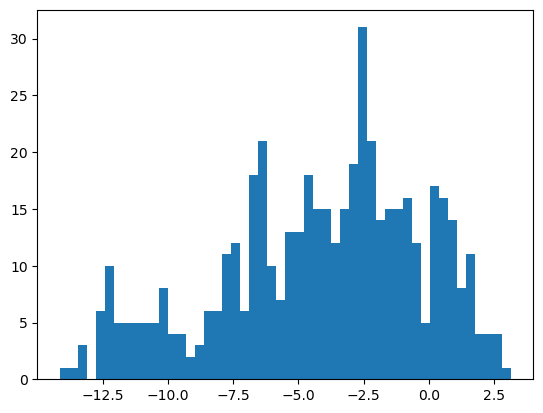

V17
NF


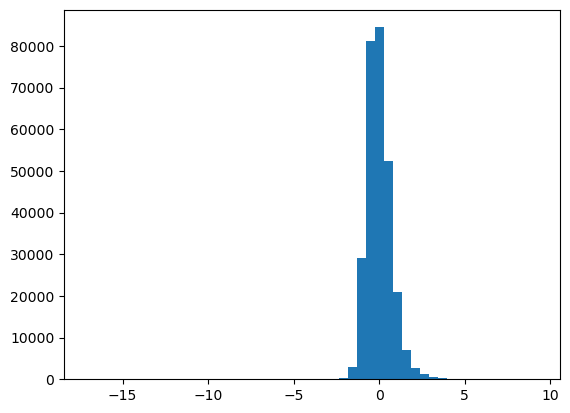

F


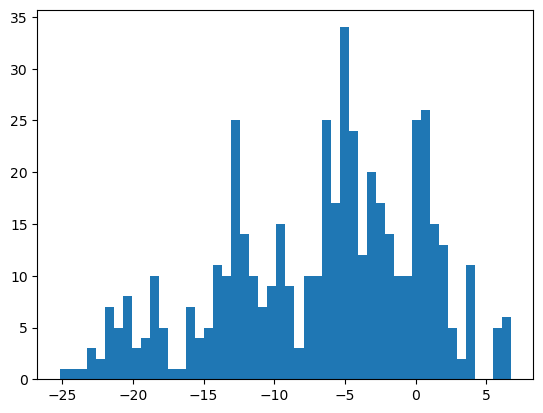

V18
NF


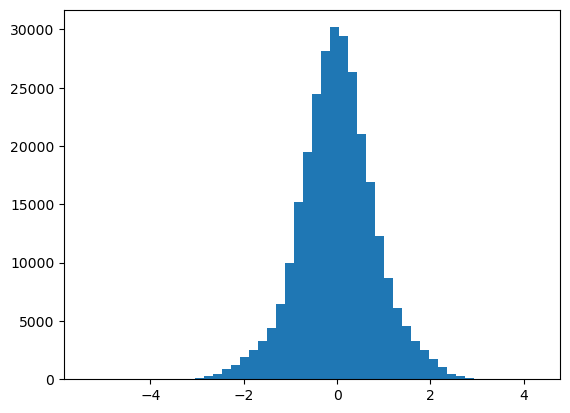

F


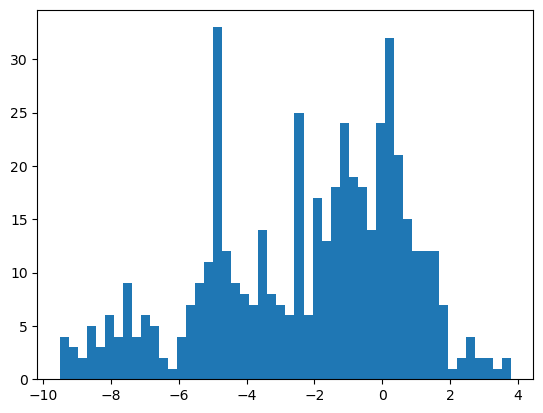

V19
NF


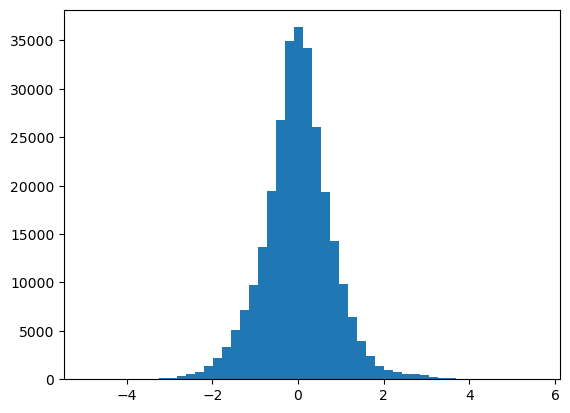

F


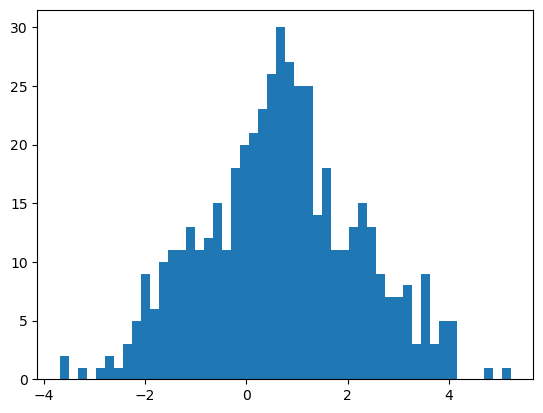

V20
NF


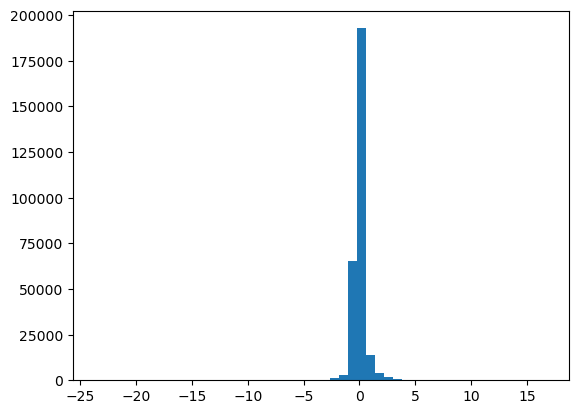

F


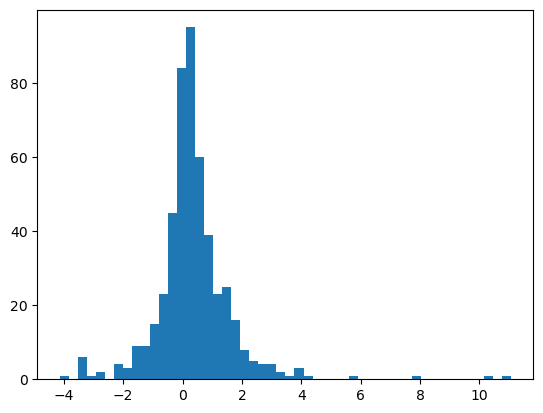

V21
NF


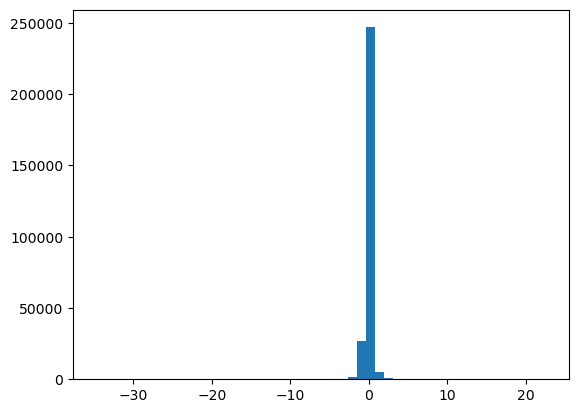

F


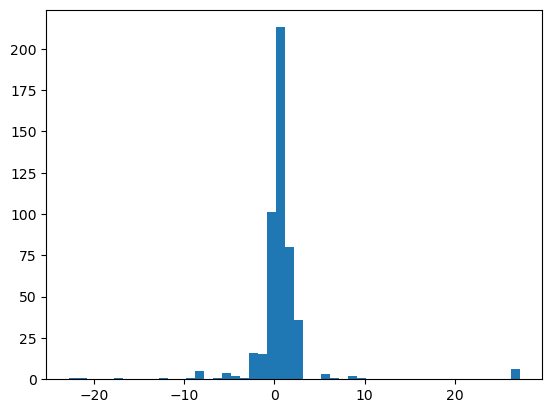

V22
NF


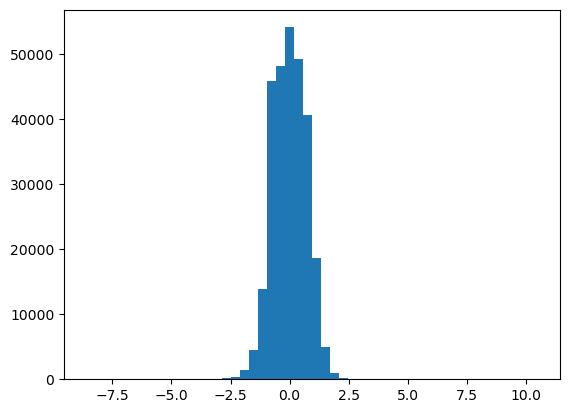

F


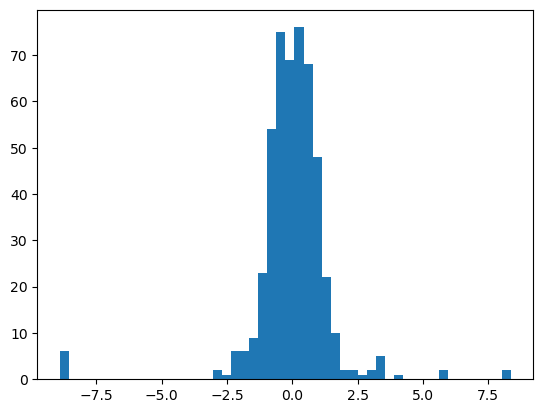

V23
NF


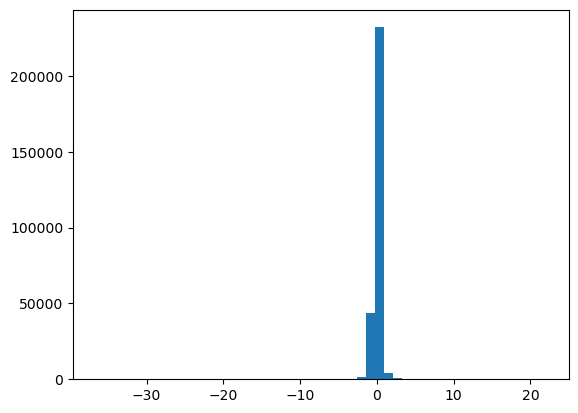

F


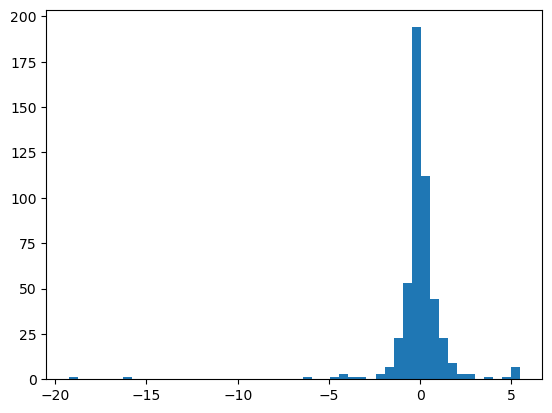

V24
NF


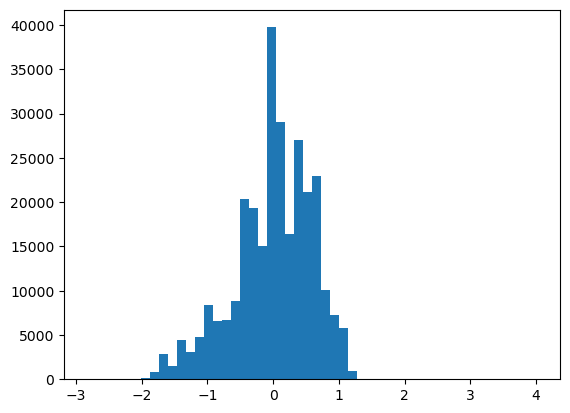

F


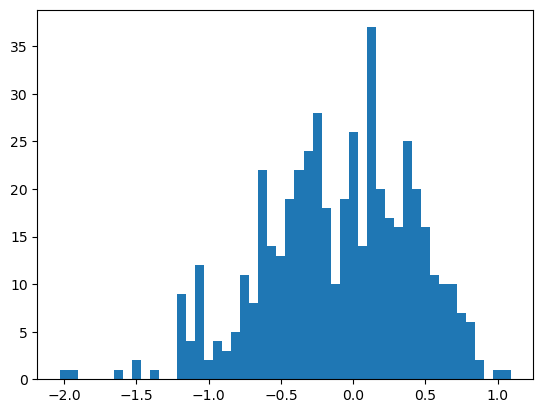

V25
NF


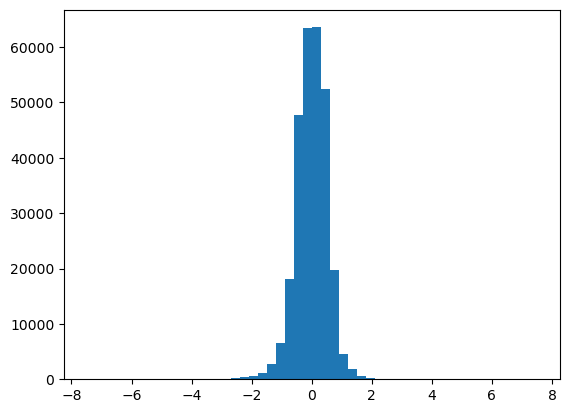

F


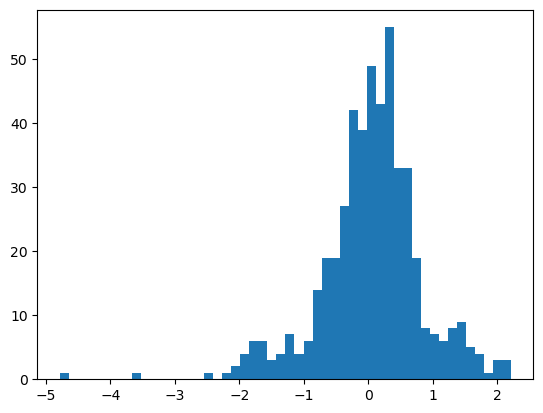

V26
NF


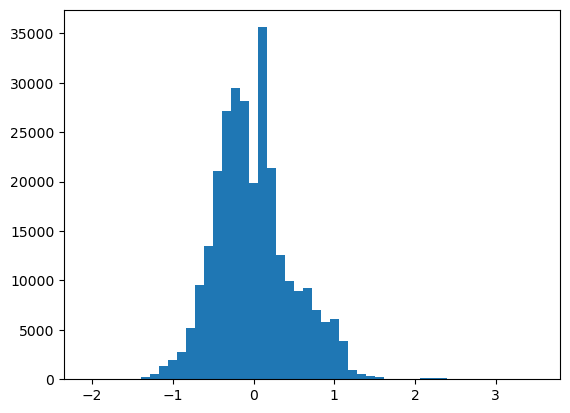

F


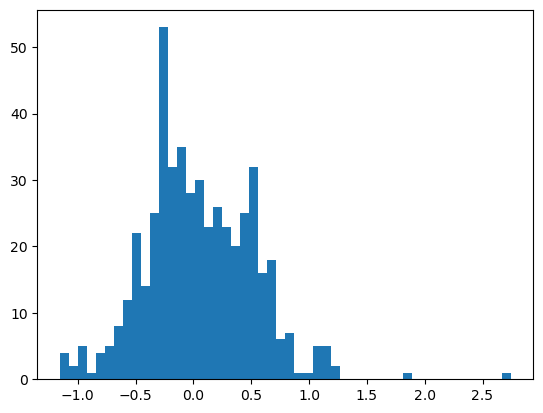

V27
NF


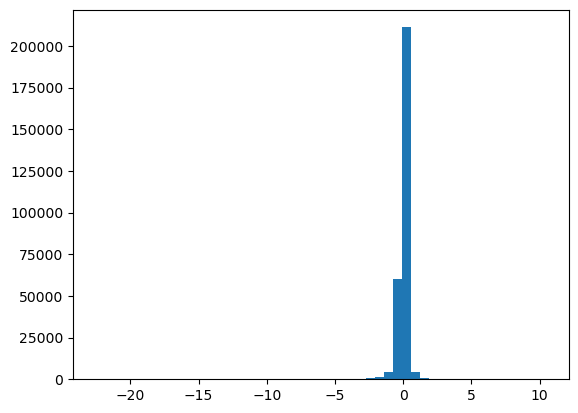

F


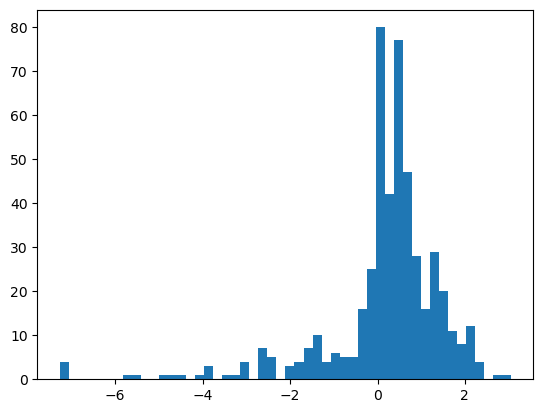

V28
NF


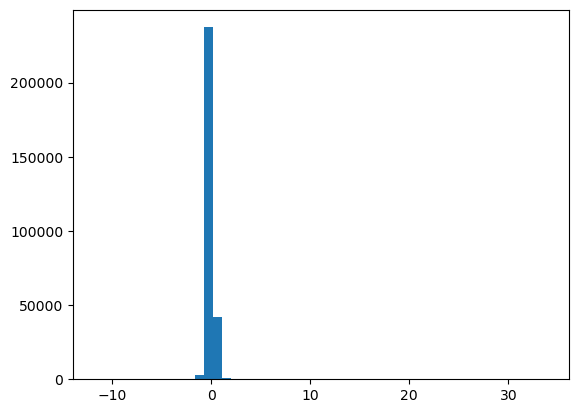

F


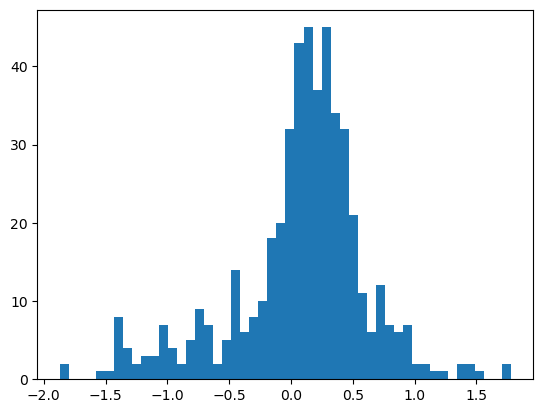

Amount
NF


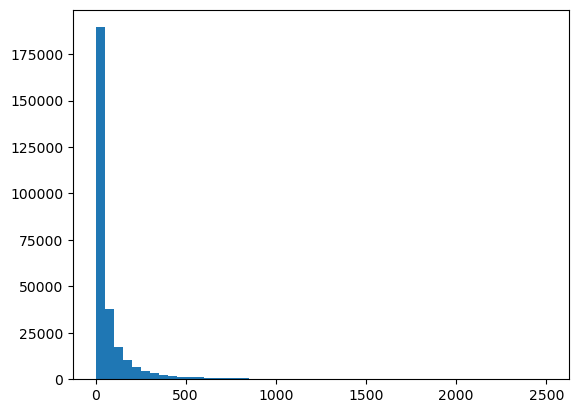

F


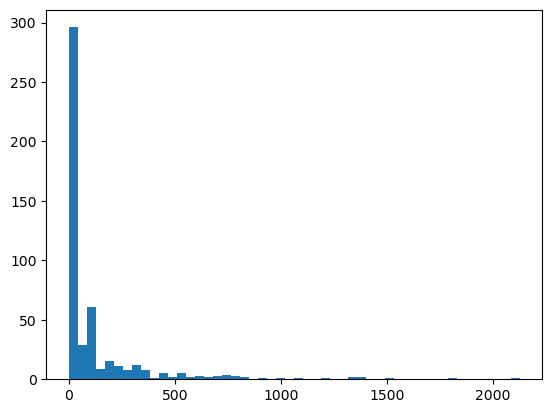

Class
NF


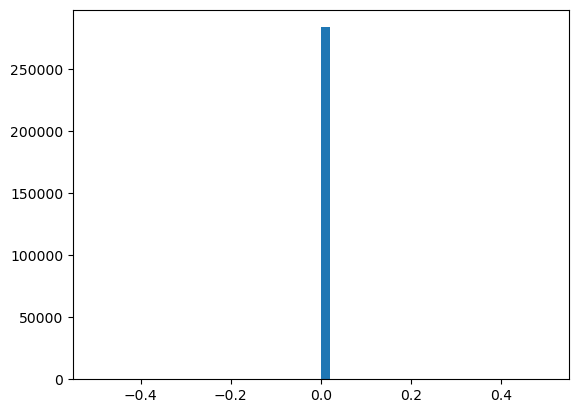

F


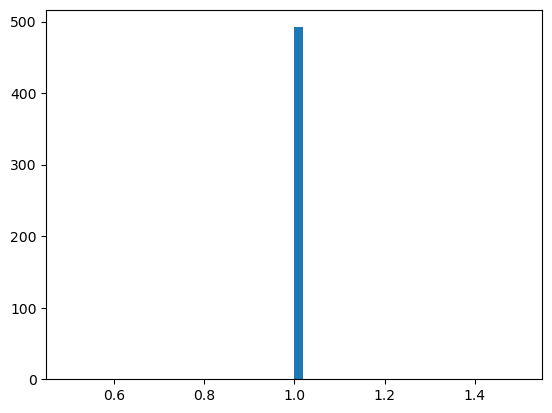

In [65]:
for x in col1:
    print(x)
    print('NF')
    plt.hist(grouped_amountlow_class0_df[x], bins=50)
    plt.show()
    print('F')
    plt.hist(grouped_amountlow_class1_df[x], bins=50)
    plt.show()

# Feature Selection

In [67]:
selected_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount',
       'Class']

In [68]:
X_col = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V27', 'V28', 'Amount']

In [69]:
grouped_amountlow_df[selected_col].head(5)

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V27  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412  0.133558   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.008983   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980 -0.055353   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038  0.062723   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542  0.219422   

        V28  Amount  Class  
0 -0.021053  149.62      0  
1  0.014724    2.69      0  
2 -0.059752  378.66      0  
3  0.061458  123.50      0  
4  0.215153   69.99      0

In [70]:
fin_df = grouped_amountlow_df[selected_col]

In [71]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25)


In [72]:
for train_index, test_index in sss.split(fin_df, fin_df['Class']):
    train_df = fin_df.iloc[train_index]
    test_df = fin_df.iloc[test_index]

In [73]:
test_df.sample(5)

Time        V1        V2        V3        V4        V5        V6  \
248078  153789.0  2.096734 -1.415689 -0.002489 -0.836007 -1.277287  0.886708   
199648  133069.0  2.018543 -0.934672 -1.201857 -0.254226 -0.799513 -1.105001   
120207   75746.0 -0.602433  1.245406  1.154852 -0.042338  0.133085 -0.529534   
196820  131710.0  2.109342  0.109974 -2.436437 -0.089550  1.241098 -0.366781   
51479    44968.0 -0.835805  0.807719  1.929742  1.394087  0.083759  0.154412   

              V7        V8        V9       V10       V11       V12       V13  \
248078 -1.818014  0.434210  0.868904  0.680799 -0.204866  0.041851 -0.405167   
199648 -0.202703 -0.307217 -0.278981  0.837177 -1.268938 -0.400502 -0.697295   
120207  0.615085  0.090020 -0.168496 -0.241258 -0.013444 -0.129703 -0.173512   
196820  0.642779 -0.294699 -0.103699  0.185483  0.400613  0.991661  0.622072   
51479   0.985087  0.048850 -1.087822 -0.128827 -1.244453 -0.464818  0.387711   

             V14       V15       V16       V17       V18       V19       V20  \
248078 -0.957528 -1.596576  1.298656  0.066478 -0.535066  1.309730 -0.029425   
199648  0.282542 -0.212923 -1.646647  0.108226  0.579039 -0.514101 -0.524509   
120207 -0.417667  1.190135  0.082163  0.293345 -0.570790 -0.478203  0.190336   
196820  0.811126 -0.213710 -0.196214 -0.895936  0.176119  0.554291 -0.133139   
51479  -0.133540  0.134398  1.232757 -1.204378  0.344630 -1.560714  0.157028   

             V27       V28  Amount  Class  
248078  0.048213 -0.045796   10.30      0  
199648 -0.075519 -0.047069   85.67      0  
120207  0.367150  0.154121    4.47      0  
196820 -0.059483 -0.079572   14.90      0  
51479   0.046225  0.128333  125.13      0

In [74]:
train_df['Class'].describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [75]:
test_df['Class'].describe()

count    71092.000000
mean         0.001730
std          0.041559
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

*Smote*

In [76]:
X_train_df = train_df[X_col]
y_train_df = train_df['Class']

In [77]:
X_test_df = test_df[X_col]
y_test_df = test_df['Class']

In [78]:
y_train_df.describe()

count    213275.000000
mean          0.001730
std           0.041559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [79]:
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_df, y_train_df)


In [80]:
X_train_smote.describe()

Time             V1             V2             V3  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean    87407.592843      -2.291191       1.802306      -3.474394   
std     48103.484889       4.975021       3.368751       5.800285   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     45606.000000      -2.929532      -0.089932      -5.048774   
50%     79905.500000      -0.837790       0.999980      -1.576089   
75%    134457.181111       0.824953       2.769558       0.264974   
max    172792.000000       2.454930      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        2.295965      -1.531196      -0.706799      -2.755473   
std         3.154658       3.816109       1.637301       5.339140   
min        -5.683171     -23.669726     -26.160506     -43.557242   
25%        -0.056121      -1.827149      -1.512130      -3.137832   
50%         1.450563      -0.461114      -0.694050      -0.753815   
75%         4.240360       0.412015       0.011140       0.173600   
max        16.491217      34.801666      13.470790      19.553200   

                  V8             V9            V10            V11  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean        0.323508      -1.307941      -2.859898       1.942650   
std         4.453409       2.191339       4.299943       2.701974   
min       -50.943369     -13.320155     -24.588262      -4.797473   
25%        -0.180215      -2.230531      -4.573640      -0.102898   
50%         0.189758      -0.807384      -1.063021       1.209314   
75%         0.874686       0.071218      -0.040958       3.549625   
max        19.168327      15.594995      23.745136      11.669205   

                 V12            V13            V14            V15  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -3.174760      -0.022429      -3.564912      -0.055475   
std         4.481554       0.984902       4.500107       0.916485   
min       -18.683715      -4.008640     -18.822087      -4.498945   
25%        -5.326890      -0.712280      -6.800199      -0.560534   
50%        -1.230240      -0.005729      -1.378718      -0.001968   
75%         0.164012       0.624829       0.070307       0.583829   
max         4.846452       4.569009       7.692209       5.825654   

                 V16            V17            V18            V19  \
count  425812.000000  425812.000000  425812.000000  425812.000000   
mean       -2.091342      -3.372032      -1.124957       0.358075   
std         3.324410       5.675261       2.276945       1.160398   
min       -14.129855     -25.162799      -9.498746      -4.932733   
25%        -3.550266      -5.496530      -1.797648      -0.348145   
50%        -0.753605      -0.639492      -0.417873       0.238438   
75%         0.214240       0.145557       0.290048       0.961506   
max         6.442798       9.253526       4.295648       5.591971   

                 V20            V27            V28         Amount  
count  425812.000000  425812.000000  425812.000000  425812.000000  
mean        0.165935       0.097438       0.028059      92.183708  
std         0.938293       0.883769       0.407124     176.792989  
min       -23.420173     -22.565679     -11.710896       0.000000  
25%        -0.191784      -0.067746      -0.060767       3.900313  
50%         0.035399       0.058901       0.032543      26.434786  
75%         0.411212       0.436154       0.199139      99.990000  
max        14.935000      10.507884      33.847808    2500.000000

In [81]:
y_train_smote.describe()

count    425812.000000
mean          0.500000
std           0.500001
min           0.000000
25%           0.000000
50%           0.500000
75%           1.000000
max           1.000000
Name: Class, dtype: float64

# Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train_smote, y_train_smote)


In [ ]:
predictions = model.predict(X_test_df)
print(classification_report(y_test_df, predictions))

In [ ]:

# Predictions
predictions = model.predict(X_test_df)

# Confusion Matrix
cm = confusion_matrix(y_test_df, predictions)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# Classification Report
print(classification_report(y_test_df, predictions))

# AUROC Curve
# Compute predicted probabilities
y_pred_prob = model.predict_proba(X_test_df)[:, 1]
# Calculate AUROC score
auroc_score = roc_auc_score(y_test_df, y_pred_prob)
print(f'AUROC Score: {auroc_score}')

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auroc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
